In [1]:
# Dataset Source
# https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

# Import needed libraries

In [2]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
from tensorflow.keras import layers, models

import warnings
warnings.filterwarnings("ignore")

# Preprocessing

In [3]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [4]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
tr_df = train_df('/content/drive/MyDrive/FinalMSDataset/Training')

In [7]:
tr_df

Class Path       Class
0     /content/drive/MyDrive/FinalMSDataset/Training...   pituitary
1     /content/drive/MyDrive/FinalMSDataset/Training...   pituitary
2     /content/drive/MyDrive/FinalMSDataset/Training...   pituitary
3     /content/drive/MyDrive/FinalMSDataset/Training...   pituitary
4     /content/drive/MyDrive/FinalMSDataset/Training...   pituitary
...                                                 ...         ...
5707  /content/drive/MyDrive/FinalMSDataset/Training...  meningioma
5708  /content/drive/MyDrive/FinalMSDataset/Training...  meningioma
5709  /content/drive/MyDrive/FinalMSDataset/Training...  meningioma
5710  /content/drive/MyDrive/FinalMSDataset/Training...  meningioma
5711  /content/drive/MyDrive/FinalMSDataset/Training...  meningioma

[5712 rows x 2 columns]

In [8]:
ts_df = test_df('/content/drive/MyDrive/FinalMSDataset/Testing')

In [9]:
ts_df

Class Path    Class
0     /content/drive/MyDrive/FinalMSDataset/Testing/...   glioma
1     /content/drive/MyDrive/FinalMSDataset/Testing/...   glioma
2     /content/drive/MyDrive/FinalMSDataset/Testing/...   glioma
3     /content/drive/MyDrive/FinalMSDataset/Testing/...   glioma
4     /content/drive/MyDrive/FinalMSDataset/Testing/...   glioma
...                                                 ...      ...
1306  /content/drive/MyDrive/FinalMSDataset/Testing/...  notumor
1307  /content/drive/MyDrive/FinalMSDataset/Testing/...  notumor
1308  /content/drive/MyDrive/FinalMSDataset/Testing/...  notumor
1309  /content/drive/MyDrive/FinalMSDataset/Testing/...  notumor
1310  /content/drive/MyDrive/FinalMSDataset/Testing/...  notumor

[1311 rows x 2 columns]

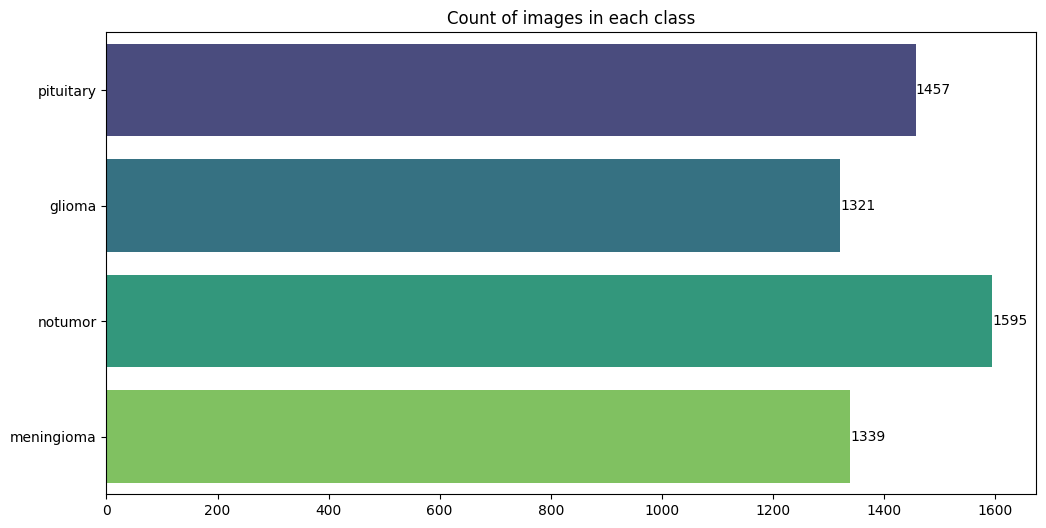

In [10]:
# Count of images in each class in train data
plt.figure(figsize=(12,6))
ax = sns.countplot(data=tr_df , y=tr_df['Class'], palette='viridis')

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=12)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")
#ax.bar_label(ax.containers[0])
plt.show()

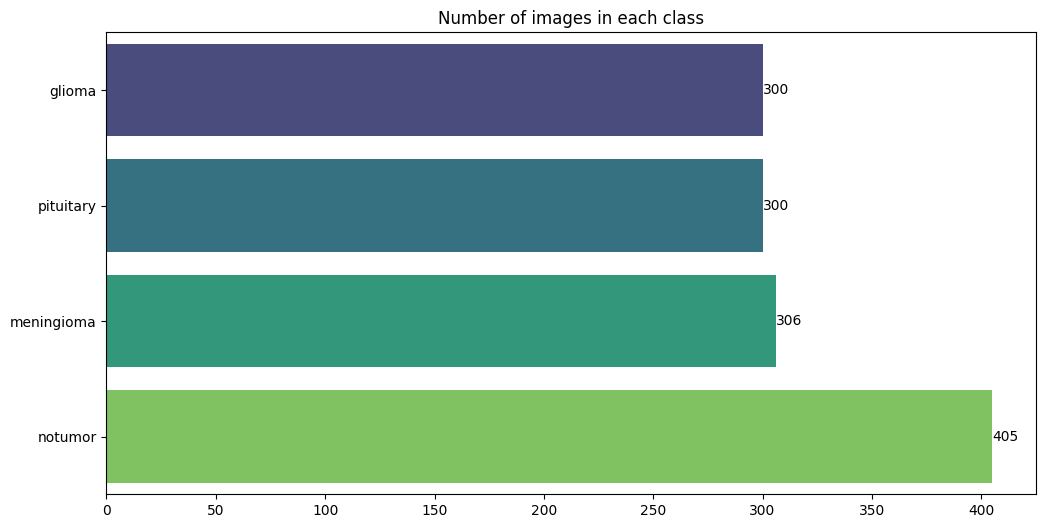

In [11]:
# Count each class in test data
plt.figure(figsize=(12, 6))
ax = sns.countplot(y=ts_df['Class'], palette='viridis')

ax.set(xlabel='', ylabel='', title='Number of images in each class')
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")
#ax.bar_label(ax.containers[0], fmt="%.0f")

plt.show()

# Split data into train, test, valid

In [12]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [13]:
valid_df

Class Path       Class
286   /content/drive/MyDrive/FinalMSDataset/Testing/...      glioma
618   /content/drive/MyDrive/FinalMSDataset/Testing/...  meningioma
361   /content/drive/MyDrive/FinalMSDataset/Testing/...   pituitary
673   /content/drive/MyDrive/FinalMSDataset/Testing/...  meningioma
109   /content/drive/MyDrive/FinalMSDataset/Testing/...      glioma
...                                                 ...         ...
59    /content/drive/MyDrive/FinalMSDataset/Testing/...      glioma
1160  /content/drive/MyDrive/FinalMSDataset/Testing/...     notumor
273   /content/drive/MyDrive/FinalMSDataset/Testing/...      glioma
794   /content/drive/MyDrive/FinalMSDataset/Testing/...  meningioma
1232  /content/drive/MyDrive/FinalMSDataset/Testing/...     notumor

[655 rows x 2 columns]

# Data preprocessing

In [14]:
batch_size = 32
img_size = (224, 224)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


# Getting samples from data

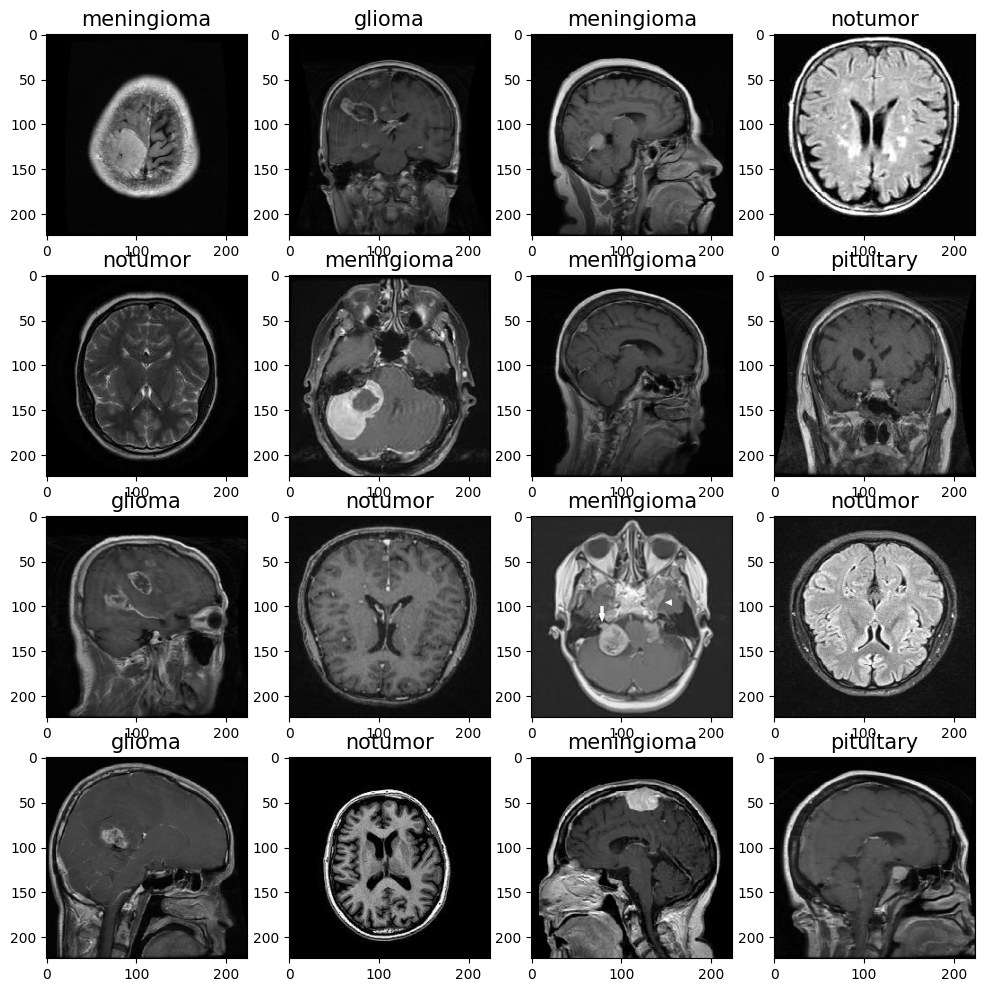

In [15]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(12, 12))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

# Building Deep Learning Model

In [16]:
pip install tensorflow einops

# Vision Transformer (ViT) Architecture

In [17]:
def build_vit_model(image_size, patch_size, num_layers, embed_dim, num_heads, mlp_dim, num_classes, dropout_rate=0.1):
    num_patches = (image_size // patch_size) ** 2

    inputs = layers.Input(shape=(image_size, image_size, 3))

    # Patch embedding
    patches = layers.Conv2D(embed_dim, kernel_size=patch_size, strides=patch_size, padding='valid')(inputs)
    patches = layers.Reshape((num_patches, embed_dim))(patches)

    # Positional encoding
    pos_embed = tf.Variable(tf.random.normal([1, num_patches, embed_dim]))
    x = patches + pos_embed

    # Transformer blocks
    for _ in range(num_layers):
        x1 = layers.LayerNormalization()(x)
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(x1, x1)
        x2 = layers.Add()([x, attention_output])

        x3 = layers.LayerNormalization()(x2)
        mlp_output = layers.Dense(mlp_dim, activation='gelu')(x3)
        mlp_output = layers.Dense(embed_dim)(mlp_output)
        x = layers.Add()([x2, mlp_output])

    # Classification head
    x = layers.LayerNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(mlp_dim, activation='gelu')(x)
    outputs = layers.Dense(num_classes)(x)

    return models.Model(inputs, outputs)

# CrossViT: Cross-Attention Multi-Scale Vision Transformer Architecture

In [18]:
from einops import rearrange

#Defining cross-attention module
# This allows each transformer branch to generate a non-patch token that acts as an agent, facilitating the exchange of information between branches through attention mechanisms.
def cross_attention(x, y, num_heads, embed_dim):
    query = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(x, y)
    return query

def build_crossvit_model(image_size, patch_sizes, embed_dim, num_heads, mlp_dim, num_classes, dropout_rate=0.1):
    inputs = layers.Input(shape=(image_size, image_size, 3))

    # Small patch embedding
    small_patches = layers.Conv2D(embed_dim, kernel_size=patch_sizes[0], strides=patch_sizes[0], padding='valid')(inputs)
    small_patches = layers.Reshape((-1, embed_dim))(small_patches)

    # Large patch embedding
    large_patches = layers.Conv2D(embed_dim, kernel_size=patch_sizes[1], strides=patch_sizes[1], padding='valid')(inputs)
    large_patches = layers.Reshape((-1, embed_dim))(large_patches)

    # Cross Attention between small and large patches
    x = cross_attention(small_patches, large_patches, num_heads, embed_dim)
    x = cross_attention(large_patches, small_patches, num_heads, embed_dim)

    # Classification head
    x = layers.LayerNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(mlp_dim, activation='gelu')(x)
    outputs = layers.Dense(num_classes)(x)

    return models.Model(inputs, outputs)

# CaiT:Class-Attention in Image Transformers Architecture

In [19]:
def build_cait_model(image_size, patch_size, num_layers, embed_dim, num_heads, mlp_dim, num_classes, dropout_rate=0.1):
    num_patches = (image_size // patch_size) ** 2

    inputs = layers.Input(shape=(image_size, image_size, 3))

    # Patch embedding
    patches = layers.Conv2D(embed_dim, kernel_size=patch_size, strides=patch_size, padding='valid')(inputs)
    patches = layers.Reshape((num_patches, embed_dim))(patches)

    # Positional encoding
    pos_embed = tf.Variable(tf.random.normal([1, num_patches, embed_dim]))
    x = patches + pos_embed

    # Transformer blocks
    for _ in range(num_layers):
        x1 = layers.LayerNormalization()(x)
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(x1, x1)
        x2 = layers.Add()([x, attention_output])

        x3 = layers.LayerNormalization()(x2)
        mlp_output = layers.Dense(mlp_dim, activation='gelu')(x3)
        mlp_output = layers.Dense(embed_dim)(mlp_output)
        x = layers.Add()([x2, mlp_output])

    # Class-attention block
    class_token = layers.LayerNormalization()(x[:, 0])
    outputs = layers.Dense(num_classes)(class_token)

    return models.Model(inputs, outputs)

# Defining the Architectures

In [20]:
vit_model = build_vit_model(image_size=224, patch_size=16, num_layers=8, embed_dim=64, num_heads=4, mlp_dim=128, num_classes=4)
vit_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 14, 14, 64)     │         49,216 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 196, 64)        │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 196, 64)        │              0 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 196, 64)        │            128 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 196, 64)        │         66,368 │ layer_normalization[0… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 196, 64)        │              0 │ add[0][0],             │
│                           │                        │                │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 196, 64)        │            128 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 196, 128)       │          8,320 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 196, 64)        │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 196, 64)        │              0 │ add_1[0][0],           │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 196, 64)        │            128 │ add_2[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 196, 64)        │         66,368 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 196, 64)        │              0 │ add_2[0][0],           │
│                           │                        │                │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_3     │ (None, 196, 64)        │            128 │ add_3[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 2,321,220 (8.85 MB)

 Trainable params: 2,321,220 (8.85 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
crossvit_model = build_crossvit_model(image_size=224, patch_sizes=[16, 32], embed_dim=64, num_heads=4, mlp_dim=128, num_classes=4)
crossvit_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 7, 7, 64)       │        196,672 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 14, 14, 64)     │         49,216 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 49, 64)         │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 196, 64)        │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_9    │ (None, 49, 64)         │         66,368 │ reshape_2[0][0],       │
│ (MultiHeadAttention)      │                        │                │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_17    │ (None, 49, 64)         │            128 │ multi_head_attention_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 3136)           │              0 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 128)            │        401,536 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 4)              │            516 │ dense_18[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 714,436 (2.73 MB)

 Trainable params: 714,436 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
cait_model = build_cait_model(image_size=224, patch_size=16, num_layers=8, embed_dim=64, num_heads=4, mlp_dim=128, num_classes=4)
cait_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 14, 14, 64)     │         49,216 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_3 (Reshape)       │ (None, 196, 64)        │              0 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_17 (Add)              │ (None, 196, 64)        │              0 │ reshape_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_18    │ (None, 196, 64)        │            128 │ add_17[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_10   │ (None, 196, 64)        │         66,368 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_18 (Add)              │ (None, 196, 64)        │              0 │ add_17[0][0],          │
│                           │                        │                │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_19    │ (None, 196, 64)        │            128 │ add_18[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 196, 128)       │          8,320 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 196, 64)        │          8,256 │ dense_20[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_19 (Add)              │ (None, 196, 64)        │              0 │ add_18[0][0],          │
│                           │                        │                │ dense_21[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_20    │ (None, 196, 64)        │            128 │ add_19[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_11   │ (None, 196, 64)        │         66,368 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_20 (Add)              │ (None, 196, 64)        │              0 │ add_19[0][0],          │
│                           │                        │                │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_21    │ (None, 196, 64)        │            128 │ add_20[0][0]           │
│ (LayerNormalization) 

 Total params: 715,204 (2.73 MB)

 Trainable params: 715,204 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

# Architectures of the model

ViT Architecture


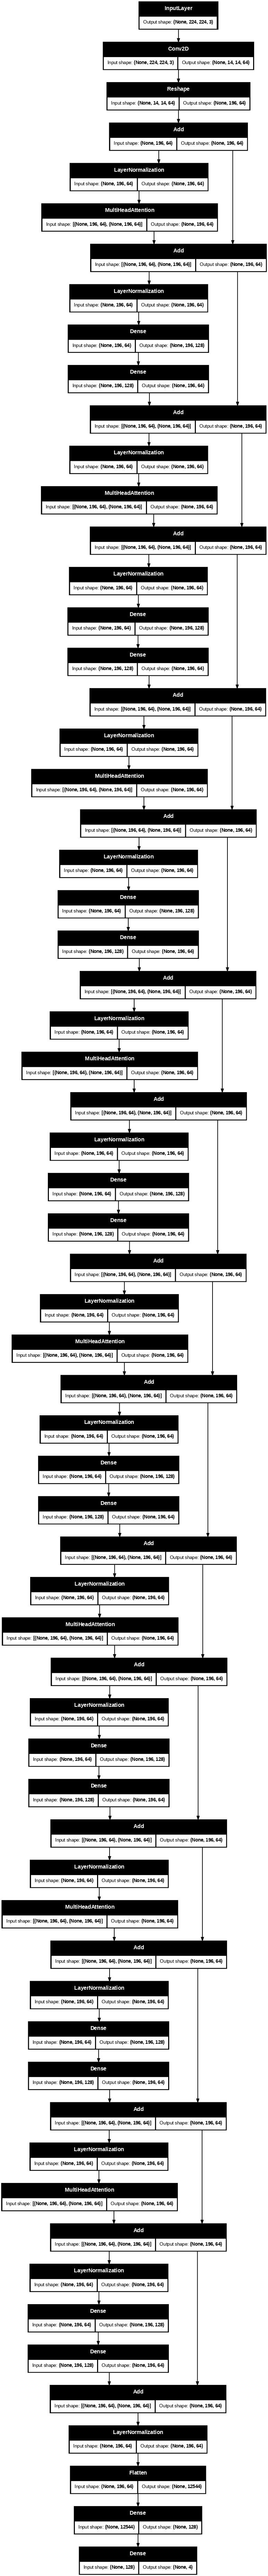

In [23]:
print("ViT Architecture")
tf.keras.utils.plot_model(vit_model, show_shapes=True, dpi=70) # Architecture of ViT Model


CrossViT Architecture


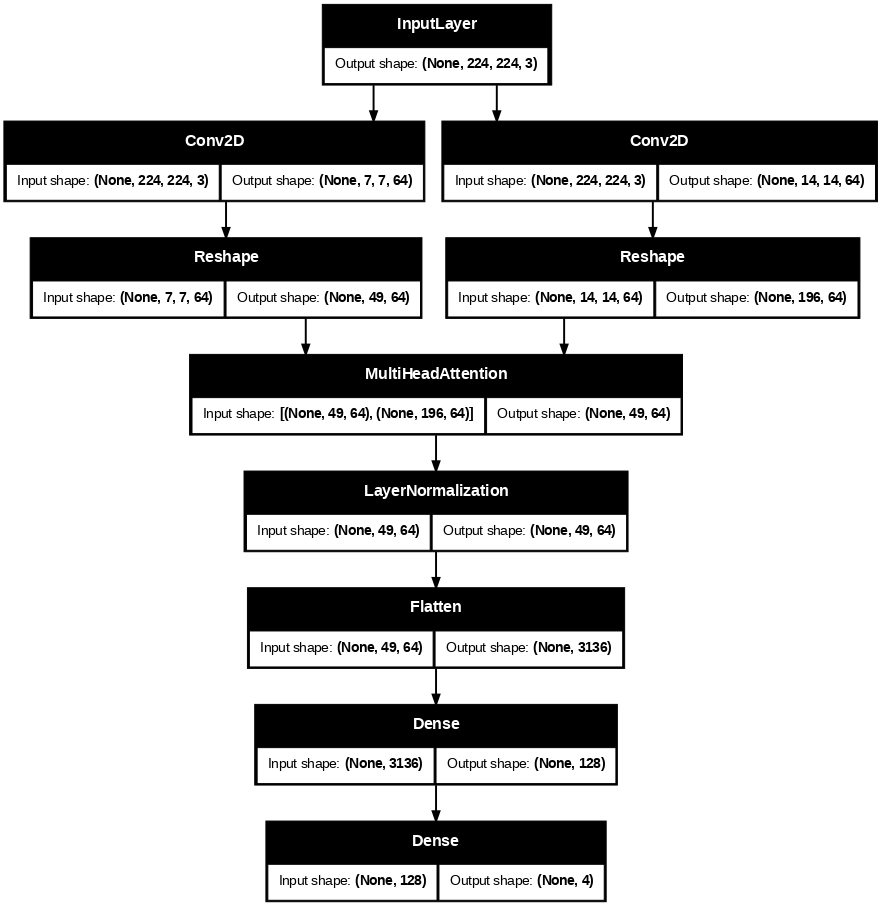

In [24]:
print("\nCrossViT Architecture")
tf.keras.utils.plot_model(crossvit_model, show_shapes=True, dpi=70) # Architecture of CrossViT Model


CaiT Architecture


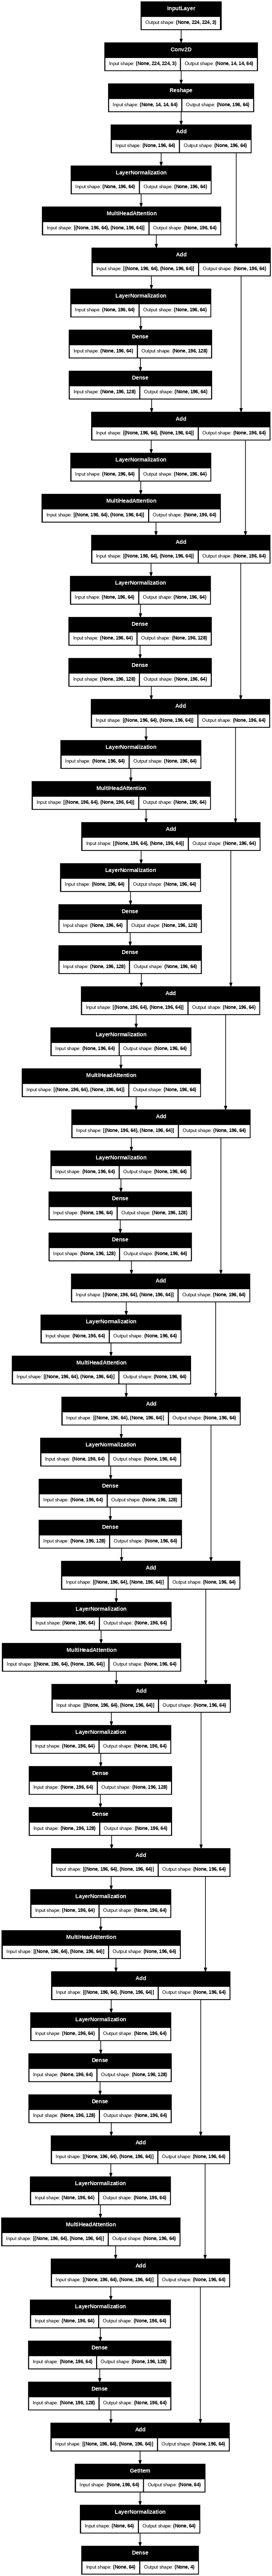

In [25]:
print("\nCaiT Architecture")
tf.keras.utils.plot_model(cait_model, show_shapes=True, dpi=70) # Architecture of CaiT Model

# Functions for compiling and training of models and ploting of metrics

In [26]:
def compile_and_train_model(model, train_ds, val_ds, epochs=20):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        #loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.CategoricalAccuracy(),Precision(),Recall()],
    )

    history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)
    return history

In [27]:
def plot_metrics(history):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Running Models

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 3985s 21s/step - categorical_accuracy: 0.4299 - loss: 1.4311 - precision: 0.2966 - recall: 0.8253 - val_categorical_accuracy: 0.6840 - val_loss: 0.8265 - val_precision: 0.3553 - val_recall: 0.9802
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 156ms/step - categorical_accuracy: 0.7119 - loss: 0.7372 - precision: 0.3681 - recall: 0.9699 - val_categorical_accuracy: 0.7221 - val_loss: 0.7005 - val_precision: 0.3835 - val_recall: 0.9802
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 153ms/step - categorical_accuracy: 0.7684 - loss: 0.6033 - precision: 0.3768 - recall: 0.9821 - val_categorical_accuracy: 0.7313 - val_loss: 0.6821 - val_precision: 0.3974 - val_recall: 0.9817
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 155ms/step - categorical_accuracy: 0.8037 - loss: 0.5189 - precision: 0.4093 - recall: 0.9819 - val_categorical_accuracy: 0.7725 - val_loss: 0.5943 - val_precision: 0.3791 - val_recall: 0.9908
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 154ms/st

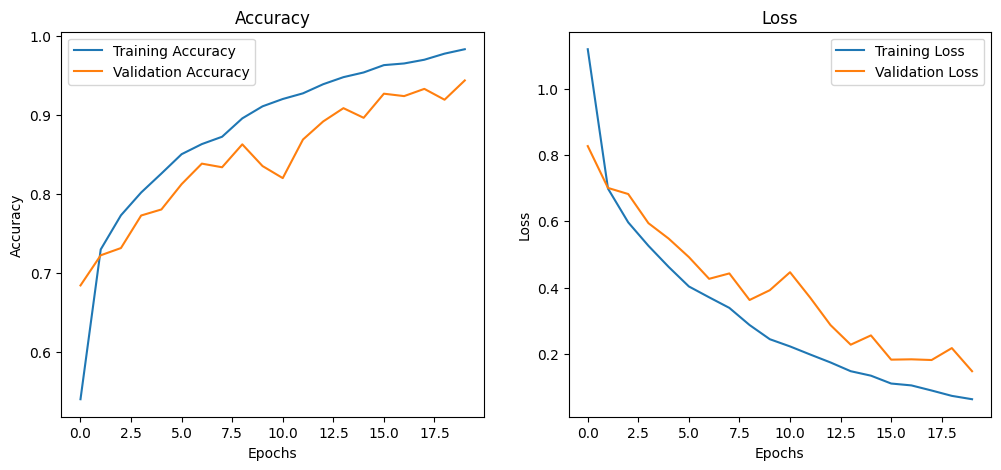

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 266ms/step - categorical_accuracy: 0.3943 - loss: 1.2568 - precision_1: 0.5204 - recall_1: 0.2103 - val_categorical_accuracy: 0.5573 - val_loss: 1.0522 - val_precision_1: 0.4833 - val_recall_1: 0.6641
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 152ms/step - categorical_accuracy: 0.6417 - loss: 0.8675 - precision_1: 0.5054 - recall_1: 0.7867 - val_categorical_accuracy: 0.7084 - val_loss: 0.7391 - val_precision_1: 0.5131 - val_recall_1: 0.8947
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 153ms/step - categorical_accuracy: 0.7276 - loss: 0.6755 - precision_1: 0.5080 - recall_1: 0.9143 - val_categorical_accuracy: 0.6962 - val_loss: 0.8070 - val_precision_1: 0.5098 - val_recall_1: 0.8779
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - categorical_accuracy: 0.7407 - loss: 0.6217 - precision_1: 0.4908 - recall_1: 0.9499 - val_categorical_accuracy: 0.7542 - val_loss: 0.6281 - val_precision_1: 0.5128 - val_recall_1: 0.9496
Epoch 5/20
179/179 ━

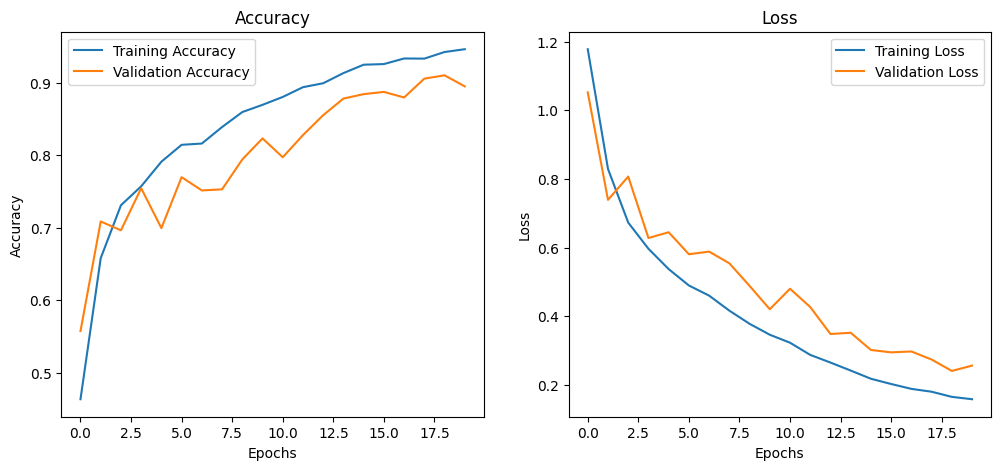

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 275ms/step - categorical_accuracy: 0.3847 - loss: 1.3098 - precision_2: 0.2722 - recall_2: 0.9346 - val_categorical_accuracy: 0.4794 - val_loss: 1.2441 - val_precision_2: 0.2999 - val_recall_2: 0.9130
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 152ms/step - categorical_accuracy: 0.5599 - loss: 1.0531 - precision_2: 0.3333 - recall_2: 0.8992 - val_categorical_accuracy: 0.5740 - val_loss: 1.0082 - val_precision_2: 0.4034 - val_recall_2: 0.8351
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 154ms/step - categorical_accuracy: 0.6319 - loss: 0.9006 - precision_2: 0.3979 - recall_2: 0.8913 - val_categorical_accuracy: 0.6015 - val_loss: 0.9846 - val_precision_2: 0.4053 - val_recall_2: 0.9053
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 154ms/step - categorical_accuracy: 0.6539 - loss: 0.8597 - precision_2: 0.4003 - recall_2: 0.9036 - val_categorical_accuracy: 0.6565 - val_loss: 0.8165 - val_precision_2: 0.4247 - val_recall_2: 0.9511
Epoch 5/20
179/179 ━

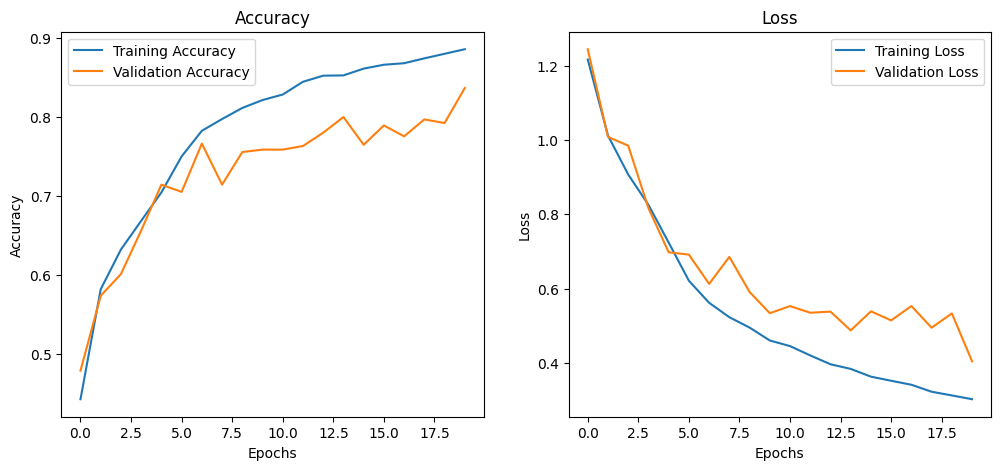

In [28]:
def runModels(train, validation):
    epochs=20
    # Vision Transformer (ViT)
    vit_model = build_vit_model(image_size=224, patch_size=16, num_layers=8, embed_dim=64, num_heads=4, mlp_dim=128, num_classes=4)
    vit_history = compile_and_train_model(vit_model, train, validation, epochs=epochs)
    plot_metrics(vit_history)
    vit_model.save('/content/drive/MyDrive/ProjectModels/vit_model.keras') # save the model in the TensorFlow SavedModel format

    # CrossViT
    crossvit_model = build_crossvit_model(image_size=224, patch_sizes=[16, 32], embed_dim=64, num_heads=4, mlp_dim=128, num_classes=4)
    crossvit_history = compile_and_train_model(crossvit_model, train, validation, epochs=epochs)
    plot_metrics(crossvit_history)
    crossvit_model.save('/content/drive/MyDrive/ProjectModels/crossvit_model.keras') # save the model in the TensorFlow SavedModel format

    # CaiT
    cait_model = build_cait_model(image_size=224, patch_size=16, num_layers=8, embed_dim=64, num_heads=4, mlp_dim=128, num_classes=4)
    cait_history = compile_and_train_model(cait_model, train, validation, epochs=epochs)
    plot_metrics(cait_history)
    cait_model.save('/content/drive/MyDrive/ProjectModels/cait_model.keras') # save the model in the TensorFlow SavedModel format

    return [vit_history, crossvit_history, cait_history]


histArray = runModels(tr_gen, valid_gen)

# Visualize model performance

In [29]:
histArray[0].history.keys()

dict_keys(['categorical_accuracy', 'loss', 'precision', 'recall', 'val_categorical_accuracy', 'val_loss', 'val_precision', 'val_recall'])

In [30]:
histArray[1].history.keys()

dict_keys(['categorical_accuracy', 'loss', 'precision_1', 'recall_1', 'val_categorical_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1'])

In [31]:
histArray[2].history.keys()

dict_keys(['categorical_accuracy', 'loss', 'precision_2', 'recall_2', 'val_categorical_accuracy', 'val_loss', 'val_precision_2', 'val_recall_2'])

In [32]:
def visualizeResult(hist, precision, recall, val_precision, val_recall):
  tr_acc = hist.history['categorical_accuracy']
  tr_loss = hist.history['loss']
  tr_per = hist.history[precision]
  tr_recall = hist.history[recall]
  val_acc = hist.history['val_categorical_accuracy']
  val_loss = hist.history['val_loss']
  val_per = hist.history[val_precision]
  val_recall = hist.history[val_recall]

  index_loss = np.argmin(val_loss)
  val_lowest = val_loss[index_loss]
  index_acc = np.argmax(val_acc)
  acc_highest = val_acc[index_acc]
  index_precision = np.argmax(val_per)
  per_highest = val_per[index_precision]
  index_recall = np.argmax(val_recall)
  recall_highest = val_recall[index_recall]

  Epochs = [i + 1 for i in range(len(tr_acc))]
  loss_label = f'Best epoch = {str(index_loss + 1)}'
  acc_label = f'Best epoch = {str(index_acc + 1)}'
  per_label = f'Best epoch = {str(index_precision + 1)}'
  recall_label = f'Best epoch = {str(index_recall + 1)}'


  plt.figure(figsize=(18, 12))
  plt.style.use('fivethirtyeight')


  plt.subplot(2, 2, 1)
  plt.plot(Epochs, tr_loss, 'r', label='Training loss')
  plt.plot(Epochs, val_loss, 'g', label='Validation loss')
  plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

  plt.subplot(2, 2, 2)
  plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
  plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
  plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

  plt.subplot(2, 2, 3)
  plt.plot(Epochs, tr_per, 'r', label='Precision')
  plt.plot(Epochs, val_per, 'g', label='Validation Precision')
  plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
  plt.title('Precision and Validation Precision')
  plt.xlabel('Epochs')
  plt.ylabel('Precision')
  plt.legend()
  plt.grid(True)

  plt.subplot(2, 2, 4)
  plt.plot(Epochs, tr_recall, 'r', label='Recall')
  plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
  plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
  plt.title('Recall and Validation Recall')
  plt.xlabel('Epochs')
  plt.ylabel('Recall')
  plt.legend()
  plt.grid(True)

  plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
  plt.show()

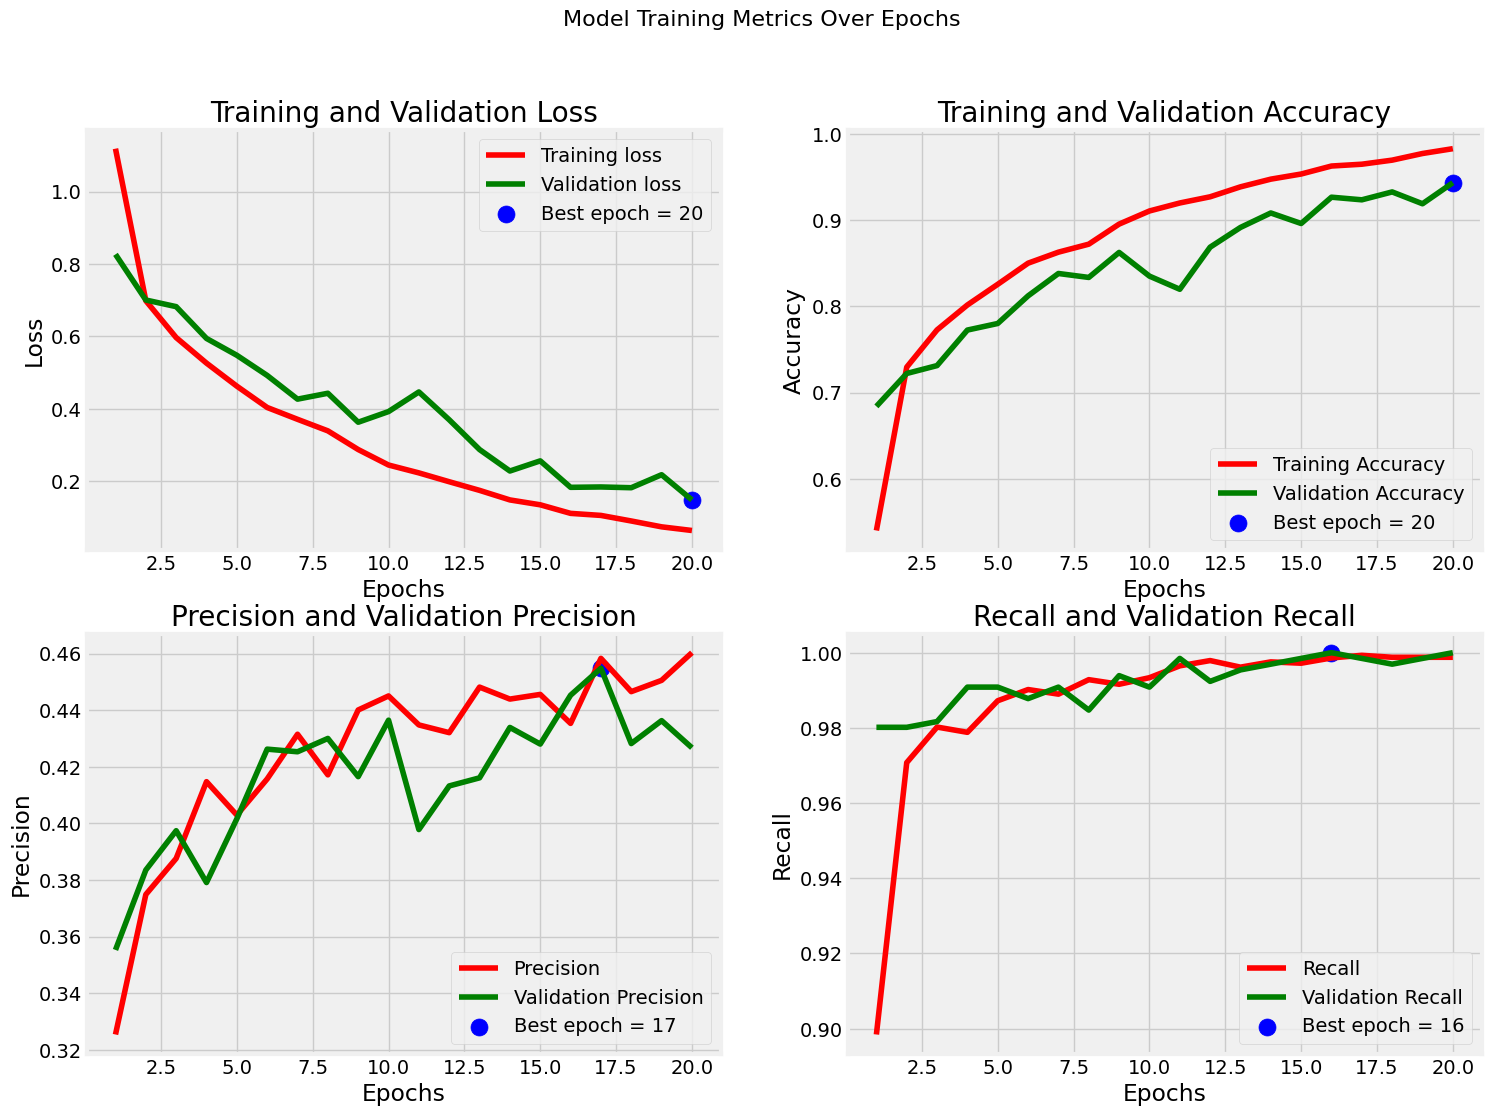

In [33]:
visualizeResult(histArray[0], 'precision', 'recall', 'val_precision', 'val_recall')

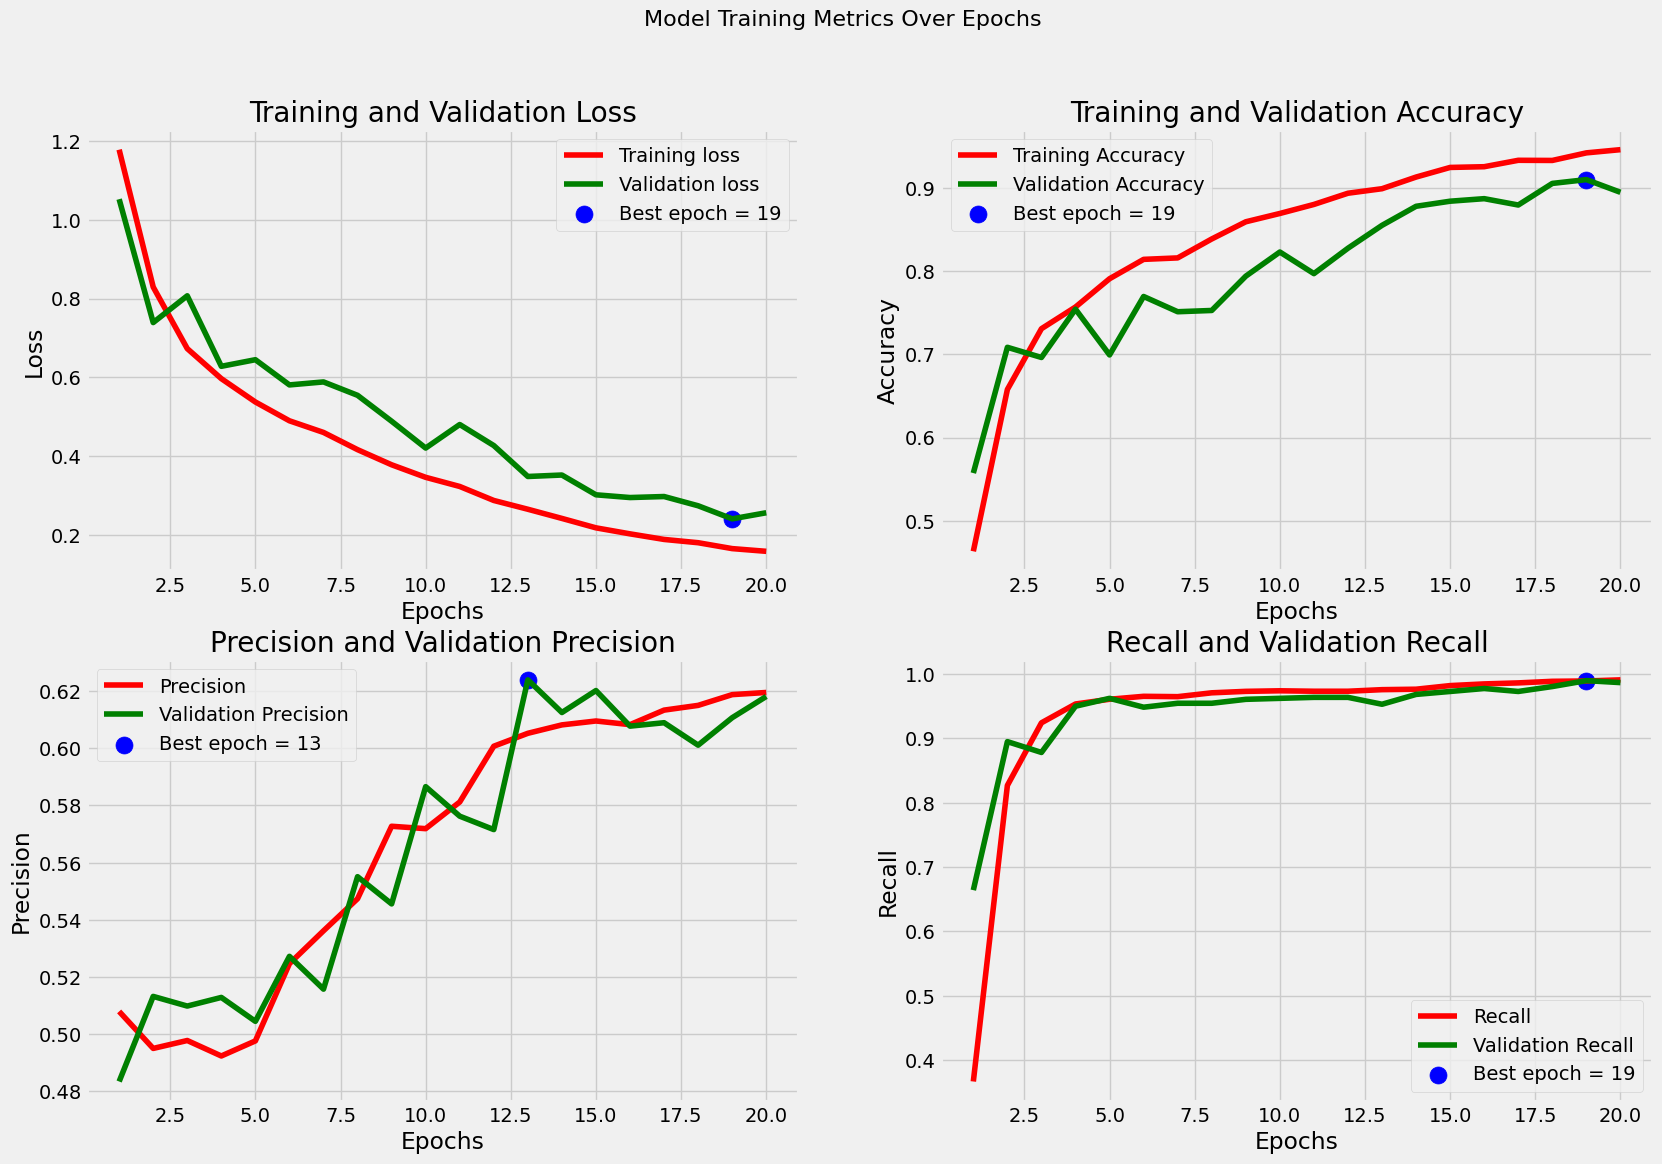

In [34]:
visualizeResult(histArray[1], 'precision_1', 'recall_1', 'val_precision_1', 'val_recall_1')

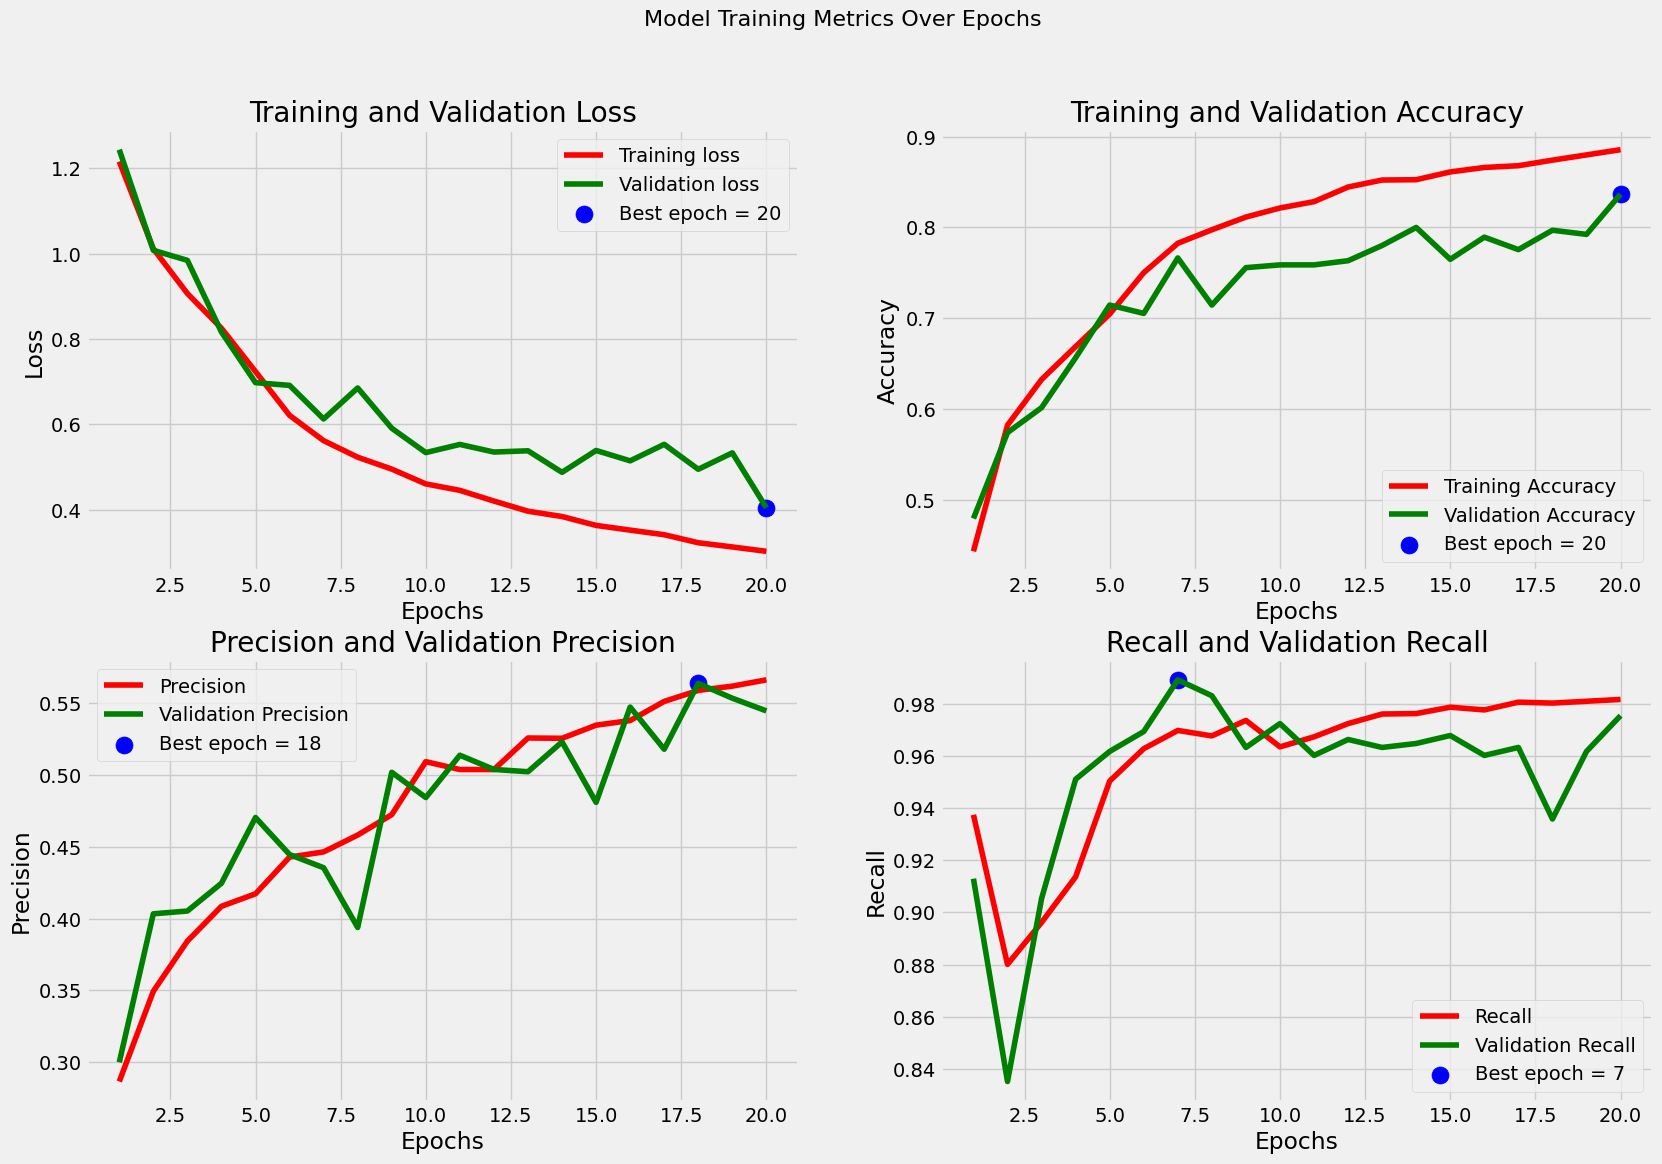

In [35]:
visualizeResult(histArray[2], 'precision_2', 'recall_2', 'val_precision_2', 'val_recall_2')

# Testing and Evaluation

# Evaluate

In [36]:
def evaluateModel(model, tr_gen, valid_gen, ts_gen):
  train_score = model.evaluate(tr_gen, verbose=1)
  valid_score = model.evaluate(valid_gen, verbose=1)
  test_score = model.evaluate(ts_gen, verbose=1)

  print(f"Train Loss: {train_score[0]:.4f}")
  print(f"Train Accuracy: {train_score[1]*100:.2f}%")
  print('-' * 20)
  print(f"Validation Loss: {valid_score[0]:.4f}")
  print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
  print('-' * 20)
  print(f"Test Loss: {test_score[0]:.4f}")
  print(f"Test Accuracy: {test_score[1]*100:.2f}%")

# Loading and testing models

In [37]:
from tensorflow.keras.models import load_model

In [38]:
# Load the model
vit_model = load_model('/content/drive/MyDrive/ProjectModels/vit_model.keras')
crossvit_model = load_model('/content/drive/MyDrive/ProjectModels/crossvit_model.keras')
cait_model = load_model('/content/drive/MyDrive/ProjectModels/cait_model.keras')

In [39]:
evaluateModel(vit_model, tr_gen, valid_gen, ts_gen) # Evaluate ViT Model

179/179 ━━━━━━━━━━━━━━━━━━━━ 33s 158ms/step - categorical_accuracy: 0.9868 - loss: 0.0555 - precision: 0.4470 - recall: 0.9996
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - categorical_accuracy: 0.9507 - loss: 0.1275 - precision: 0.4392 - recall: 1.0000
41/41 ━━━━━━━━━━━━━━━━━━━━ 324s 8s/step - categorical_accuracy: 0.9310 - loss: 0.2231 - precision: 0.4373 - recall: 0.9967
Train Loss: 0.0530
Train Accuracy: 98.83%
--------------------
Validation Loss: 0.1519
Validation Accuracy: 94.35%
--------------------
Test Loss: 0.2086
Test Accuracy: 94.05%


In [40]:
evaluateModel(crossvit_model, tr_gen, valid_gen, ts_gen) # Evaluate CrossViT Model

179/179 ━━━━━━━━━━━━━━━━━━━━ 29s 153ms/step - categorical_accuracy: 0.9435 - loss: 0.1491 - precision_1: 0.6319 - recall_1: 0.9944
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - categorical_accuracy: 0.9029 - loss: 0.2480 - precision_1: 0.6106 - recall_1: 0.9804
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - categorical_accuracy: 0.9046 - loss: 0.2737 - precision_1: 0.6214 - recall_1: 0.9807
Train Loss: 0.1443
Train Accuracy: 94.57%
--------------------
Validation Loss: 0.2618
Validation Accuracy: 89.62%
--------------------
Test Loss: 0.2609
Test Accuracy: 90.09%


In [41]:
evaluateModel(cait_model, tr_gen, valid_gen, ts_gen) # Evaluate CaiT Model

179/179 ━━━━━━━━━━━━━━━━━━━━ 32s 155ms/step - categorical_accuracy: 0.9108 - loss: 0.2481 - precision_2: 0.5713 - recall_2: 0.9883
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - categorical_accuracy: 0.8176 - loss: 0.4171 - precision_2: 0.5416 - recall_2: 0.9865
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - categorical_accuracy: 0.8349 - loss: 0.4060 - precision_2: 0.5467 - recall_2: 0.9665
Train Loss: 0.2472
Train Accuracy: 91.02%
--------------------
Validation Loss: 0.4021
Validation Accuracy: 82.29%
--------------------
Test Loss: 0.3919
Test Accuracy: 84.91%


In [42]:
def modelPrediction(model, ts_gen):
  preds = model.predict(ts_gen)
  y_pred = np.argmax(preds, axis=1)
  return y_pred

In [43]:
y_predvit = modelPrediction(vit_model, ts_gen)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step


In [44]:
y_predcrossvit = modelPrediction(crossvit_model, ts_gen)

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step


In [45]:
y_predcait = modelPrediction(cait_model, ts_gen)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step


# Confusion Matrix

In [46]:
def printMatrix(ts_gen, y_pred):
  cm = confusion_matrix(ts_gen.classes, y_pred)
  labels = list(class_dict.keys())
  plt.figure(figsize=(10,8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Label')
  plt.ylabel('Truth Label')
  plt.show()

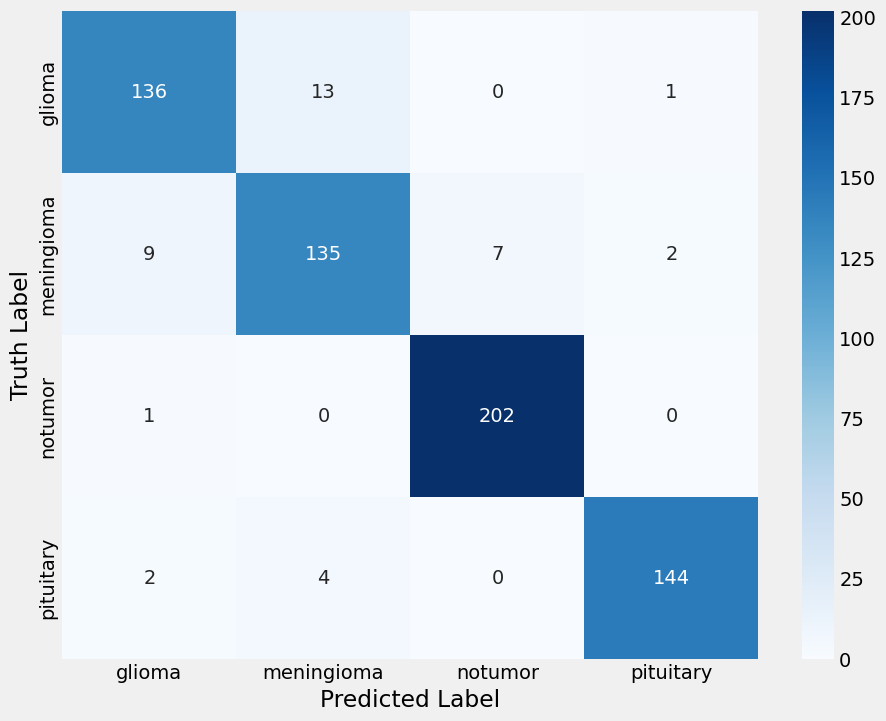

In [47]:
printMatrix(ts_gen, y_predvit) # print confusion matrix for vit algorithm

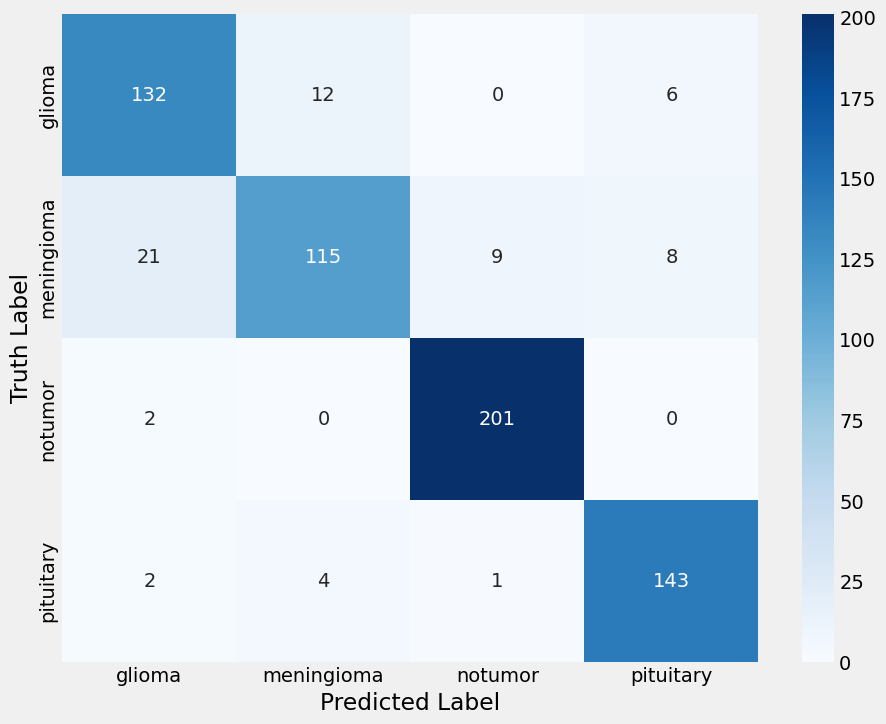

In [48]:
printMatrix(ts_gen, y_predcrossvit) # print confusion matrix for crossvit algorithm

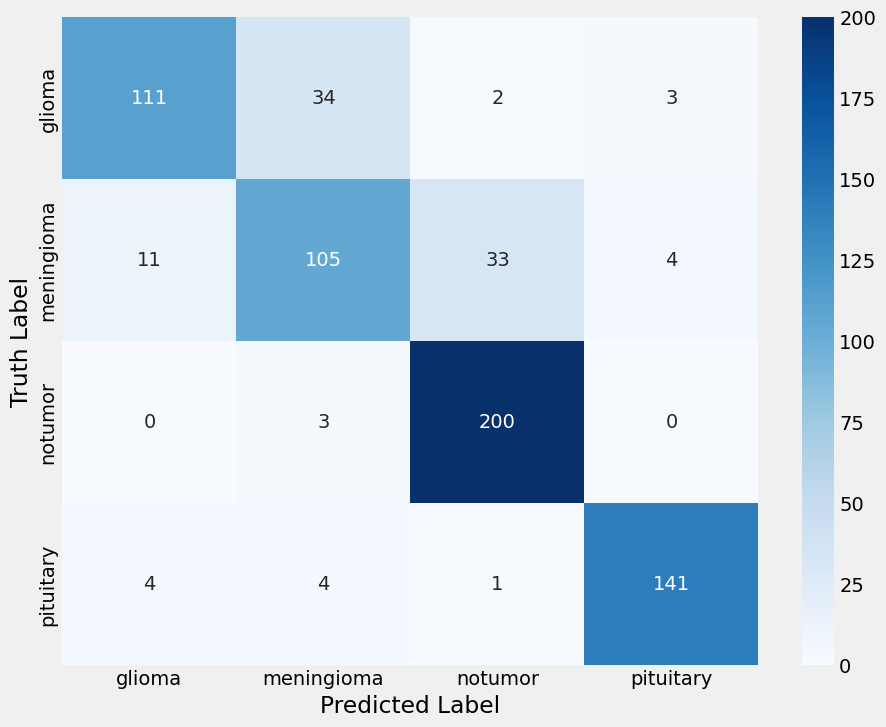

In [49]:
printMatrix(ts_gen, y_predcait) # print confusion matrix for cait algorithm

# Classification Report

In [50]:
clr = classification_report(ts_gen.classes, y_predvit)
print(clr)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       150
           1       0.89      0.88      0.89       153
           2       0.97      1.00      0.98       203
           3       0.98      0.96      0.97       150

    accuracy                           0.94       656
   macro avg       0.94      0.94      0.94       656
weighted avg       0.94      0.94      0.94       656



In [51]:
clr = classification_report(ts_gen.classes, y_predcrossvit)
print(clr)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       150
           1       0.88      0.75      0.81       153
           2       0.95      0.99      0.97       203
           3       0.91      0.95      0.93       150

    accuracy                           0.90       656
   macro avg       0.90      0.89      0.89       656
weighted avg       0.90      0.90      0.90       656



In [52]:
clr = classification_report(ts_gen.classes, y_predcait)
print(clr)

              precision    recall  f1-score   support

           0       0.88      0.74      0.80       150
           1       0.72      0.69      0.70       153
           2       0.85      0.99      0.91       203
           3       0.95      0.94      0.95       150

    accuracy                           0.85       656
   macro avg       0.85      0.84      0.84       656
weighted avg       0.85      0.85      0.85       656



# Testing

In [53]:
def predict(img_path, model):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image

    # Debug: Check model input shape
    print("Model input shape:", model.input_shape)

    # Load class labels
    label = list(class_dict.keys())  # Assuming `class_dict` is defined

    # Load and preprocess the image
    plt.figure(figsize=(10, 8))
    img = Image.open(img_path).convert('RGB')
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img) / 255.0  # Normalize pixel values to [0, 1]

    # Expand dimensions to add batch size
    input_img = np.expand_dims(img, axis=0)

    # Debug: Check image shape after preprocessing
    print("Preprocessed image shape:", input_img.shape)

    # Ensure that the input shape matches model expectations
    if input_img.shape[1:] != model.input_shape[1:]:
        raise ValueError(f"Input image shape {input_img.shape} does not match model input shape {model.input_shape}")

    # Make predictions
    predictions = model.predict(input_img)

    # Extract prediction probabilities and labels
    probs = list(predictions[0])
    labels = label

    # Plot the image and the prediction probabilities
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.axis('off')
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')
    plt.show()

    return predictions


Checking Glioma
Model input shape: (None, 224, 224, 3)
Preprocessed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


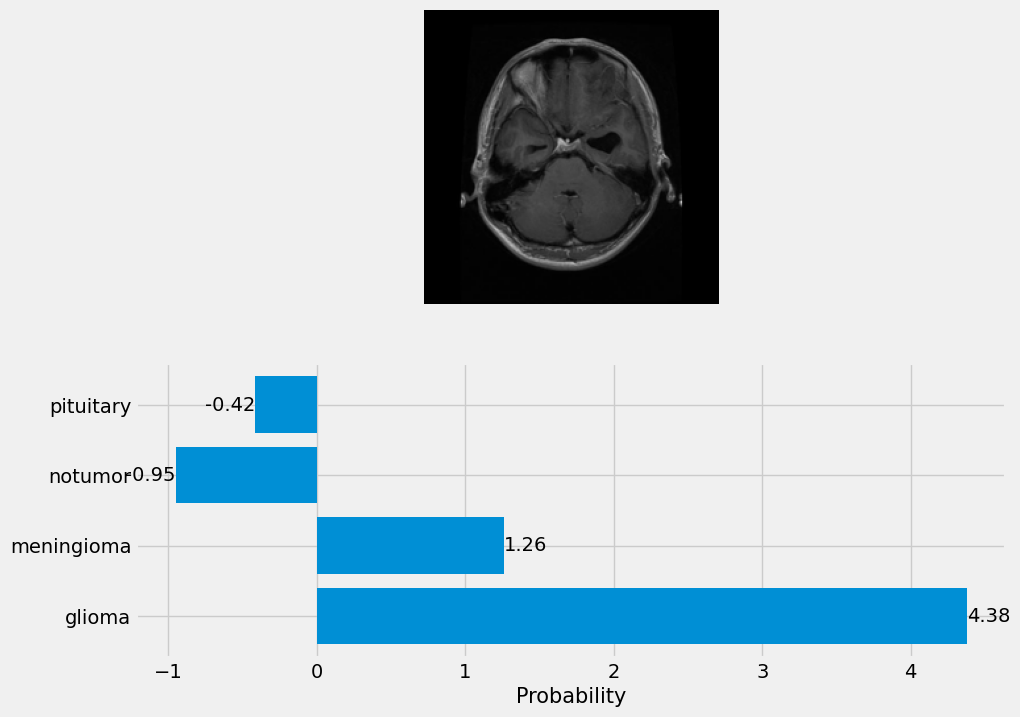


Checking Meningioma
Model input shape: (None, 224, 224, 3)
Preprocessed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


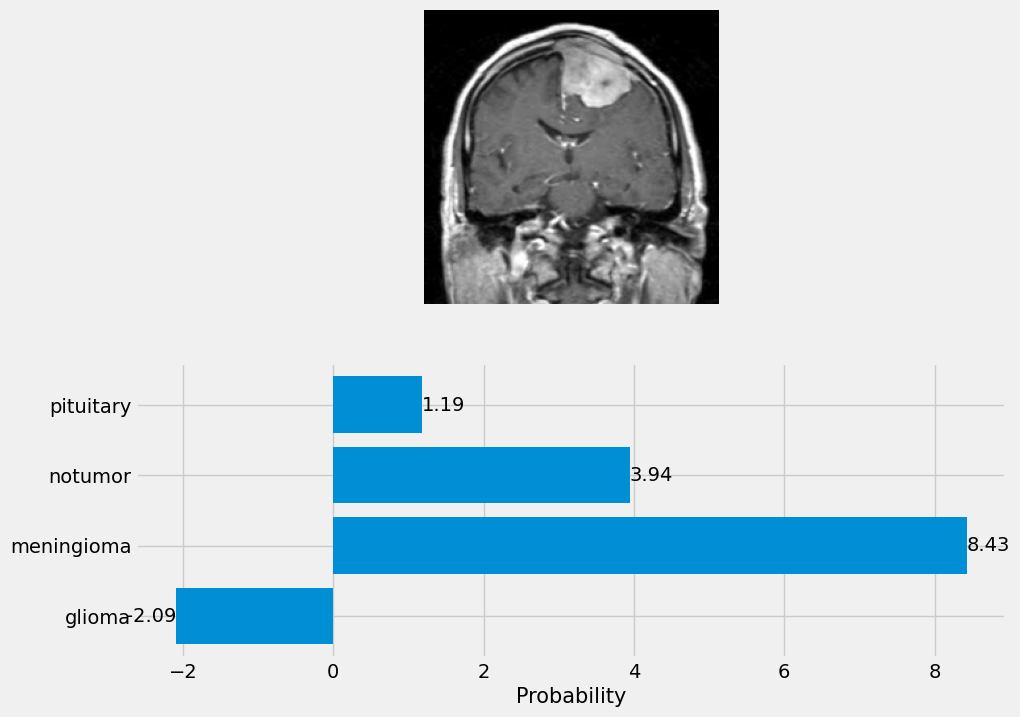


Checking Non-Tumor
Model input shape: (None, 224, 224, 3)
Preprocessed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


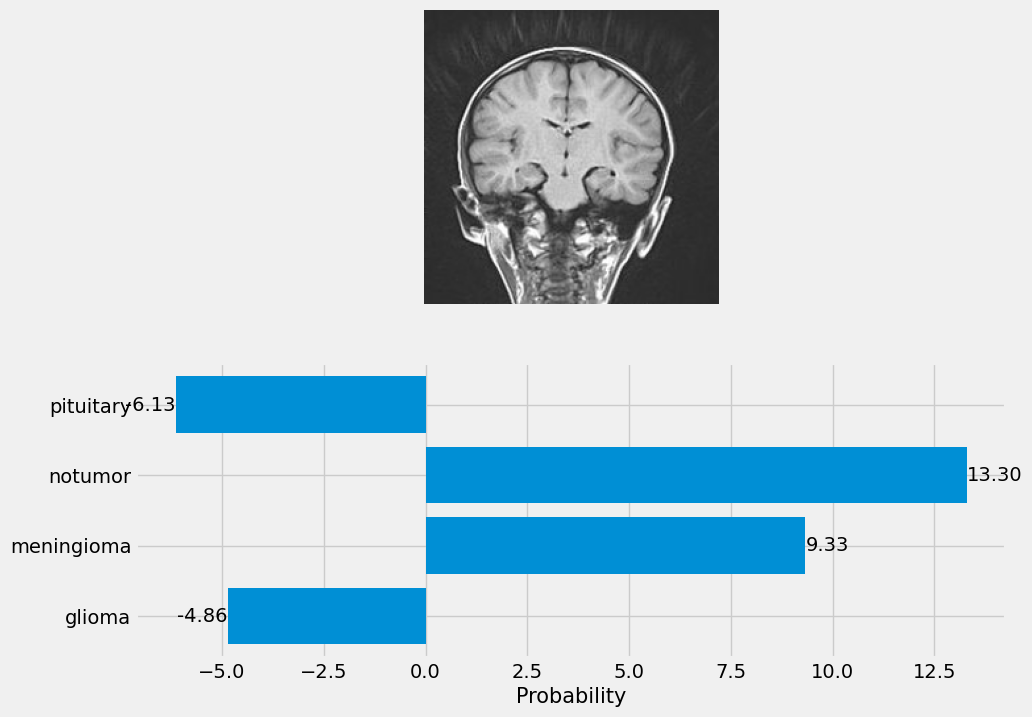


Checking Pituitary
Model input shape: (None, 224, 224, 3)
Preprocessed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


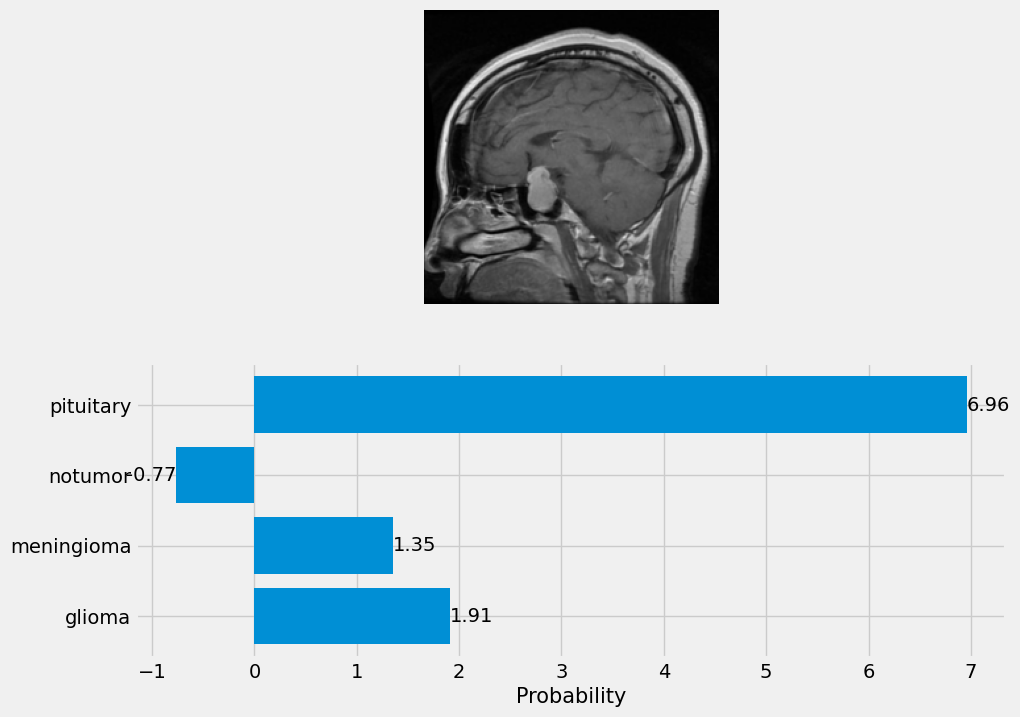

In [54]:
print("Checking Glioma")
vit_prediction = predict("/content/drive/MyDrive/FinalMSDataset/Testing/glioma/Te-glTr_0004.jpg", vit_model)
print("\nChecking Meningioma")
vit_prediction = predict("/content/drive/MyDrive/FinalMSDataset/Testing/meningioma/Te-me_0042.jpg", vit_model)
print("\nChecking Non-Tumor")
vit_prediction = predict("/content/drive/MyDrive/FinalMSDataset/Testing/notumor/Te-no_0025.jpg", vit_model)
print("\nChecking Pituitary")
vit_prediction = predict("/content/drive/MyDrive/FinalMSDataset/Training/pituitary/Tr-pi_0022.jpg", vit_model)


Checking Glioma
Model input shape: (None, 224, 224, 3)
Preprocessed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


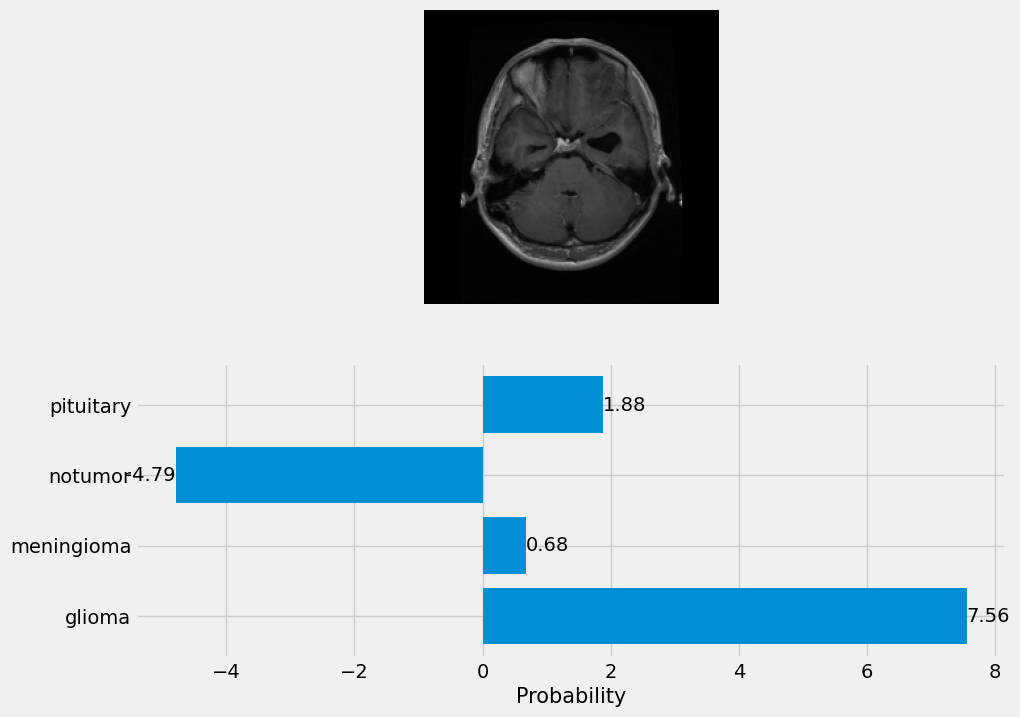


Checking Meningioma
Model input shape: (None, 224, 224, 3)
Preprocessed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


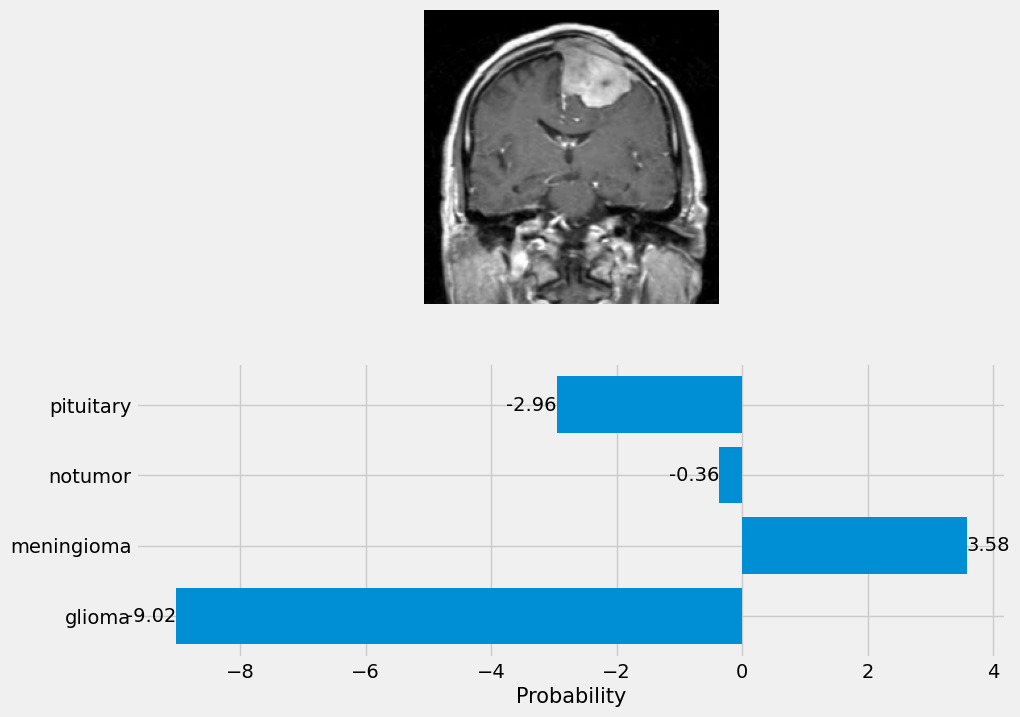


Checking Non-Tumor
Model input shape: (None, 224, 224, 3)
Preprocessed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


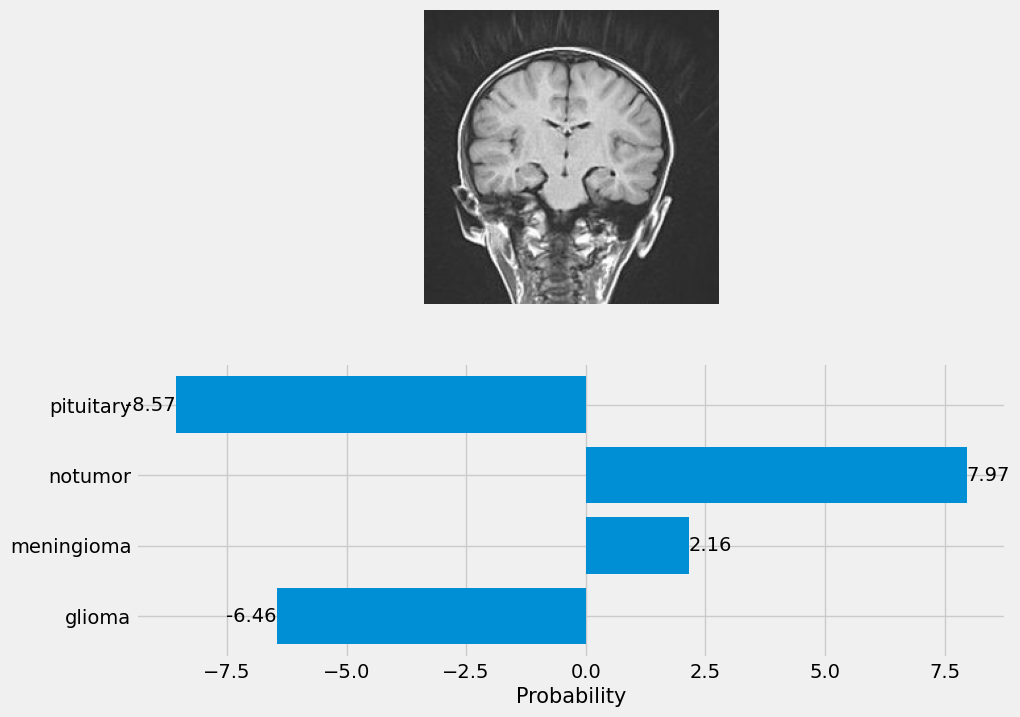


Checking Pituitary
Model input shape: (None, 224, 224, 3)
Preprocessed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


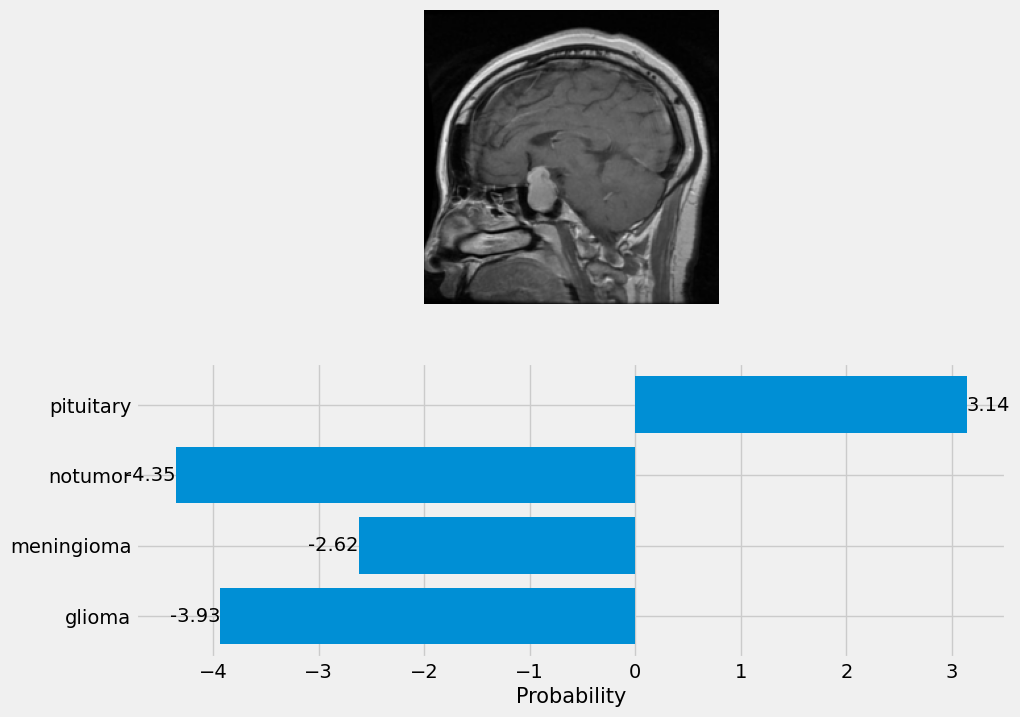

In [55]:
print("Checking Glioma")
crossvit_prediction = predict("/content/drive/MyDrive/FinalMSDataset/Testing/glioma/Te-glTr_0004.jpg", crossvit_model)
print("\nChecking Meningioma")
crossvit_prediction = predict("/content/drive/MyDrive/FinalMSDataset/Testing/meningioma/Te-me_0042.jpg", crossvit_model)
print("\nChecking Non-Tumor")
crossvit_prediction = predict("/content/drive/MyDrive/FinalMSDataset/Testing/notumor/Te-no_0025.jpg", crossvit_model)
print("\nChecking Pituitary")
crossvit_prediction = predict("/content/drive/MyDrive/FinalMSDataset/Training/pituitary/Tr-pi_0022.jpg", crossvit_model)

Checking Glioma
Model input shape: (None, 224, 224, 3)
Preprocessed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


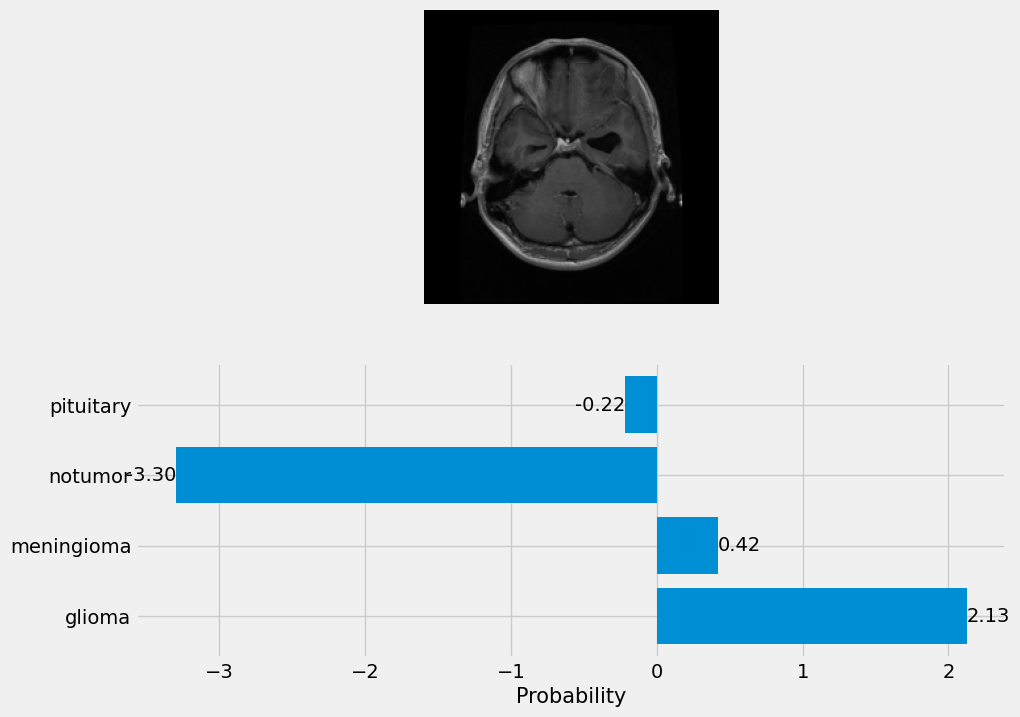


Checking Meningioma
Model input shape: (None, 224, 224, 3)
Preprocessed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


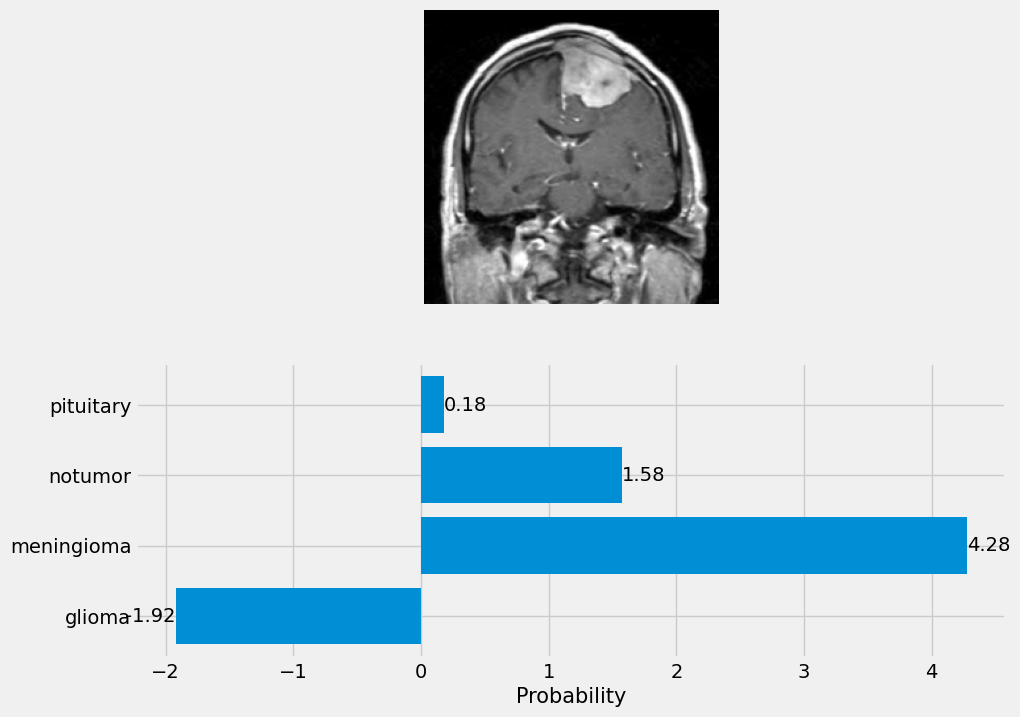


Checking Non-Tumor
Model input shape: (None, 224, 224, 3)
Preprocessed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


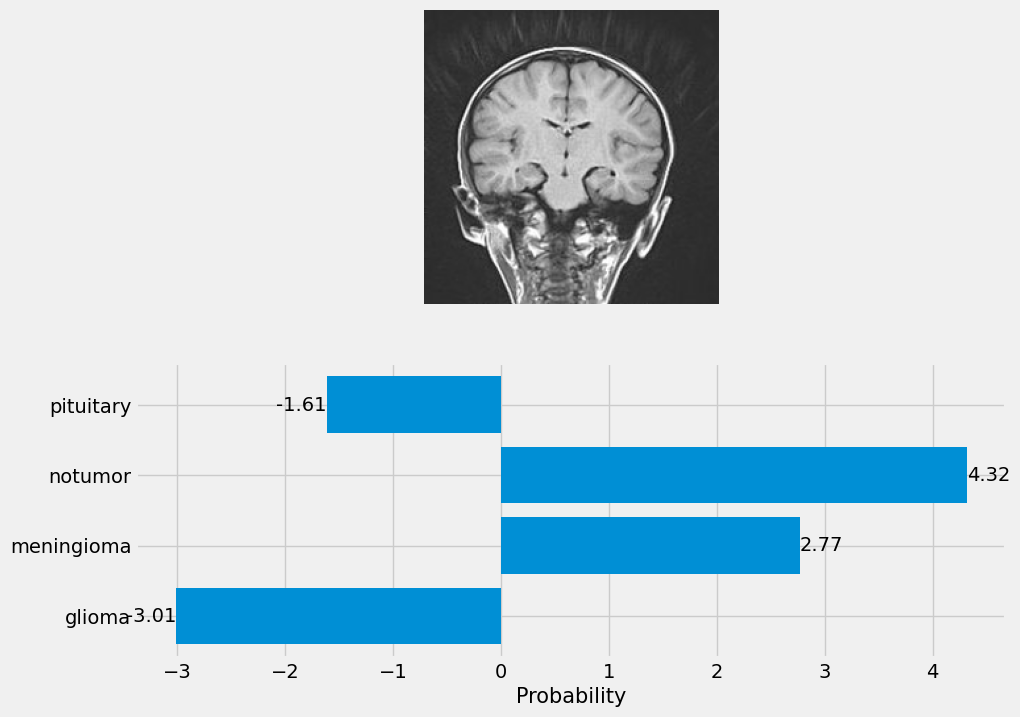


Checking Pituitary
Model input shape: (None, 224, 224, 3)
Preprocessed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


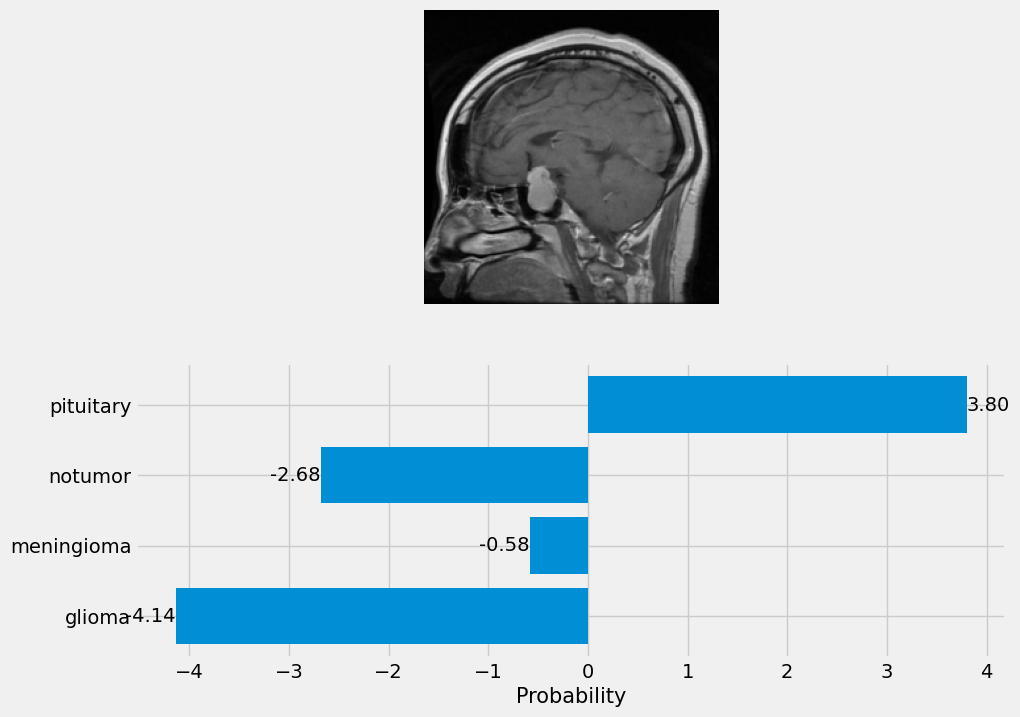

In [56]:
print("Checking Glioma")
cait_prediction = predict("/content/drive/MyDrive/FinalMSDataset/Testing/glioma/Te-glTr_0004.jpg", cait_model)
print("\nChecking Meningioma")
cait_prediction = predict("/content/drive/MyDrive/FinalMSDataset/Testing/meningioma/Te-me_0042.jpg", cait_model)
print("\nChecking Non-Tumor")
cait_prediction = predict("/content/drive/MyDrive/FinalMSDataset/Testing/notumor/Te-no_0025.jpg", cait_model)
print("\nChecking Pituitary")
cait_prediction = predict("/content/drive/MyDrive/FinalMSDataset/Training/pituitary/Tr-pi_0022.jpg", cait_model)

# eXplainable AI (XAI)

# Using Lime Algorithm

In [57]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=2eaaa909b8e8b8990a942e95936c28540b224657b0fb7e2c0180c64e9205a0c2
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from PIL import Image

# Function to preprocess image for the model
def preprocess_image(img_path, target_size=(224, 224)):
    img = Image.open(img_path).convert('RGB')  # Ensure image is in RGB format
    resized_img = img.resize(target_size)  # Resize to the model input size
    img_array = np.asarray(resized_img) / 255.0  # Normalize pixel values to [0, 1]
    input_img = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return input_img, resized_img

# Define a prediction function for LIME
def create_vit_prediction_function(model):
    def vit_prediction(images):
        processed_images = np.array([image for image in images])  # Prepare images for prediction
        return model.predict(processed_images)  # Use the provided model to make predictions
    return vit_prediction

# Function to generate LIME explanation and visualization
def explain_image_with_lime(img_path, model, top_labels=5, num_samples=1000, target_size=(224, 224)):
    # Step 1: Initialize the LIME explainer
    explainer = lime_image.LimeImageExplainer()

    # Step 2: Preprocess the input image
    input_img, resized_img = preprocess_image(img_path, target_size)

    # Step 3: Create prediction function using the provided model
    vit_prediction = create_vit_prediction_function(model)

    # Step 4: Explain the model's prediction on the chosen image
    explanation = explainer.explain_instance(
        input_img[0],  # Pass the 3D image (without batch dimension) to LIME
        vit_prediction,
        top_labels=top_labels,  # Get top predicted labels
        hide_color=0,
        num_samples=num_samples
    )

    # Step 5: Retrieve the top label if unsure of the class index
    top_labels = explanation.top_labels
    class_index = top_labels[0]  # Use the highest predicted label for explanation

    # Step 6: Visualize the explanation for the target class
    temp, mask = explanation.get_image_and_mask(
        label=class_index,
        positive_only=True,
        hide_rest=False,
        num_features=10,
        min_weight=0.1
    )

    # Display the explanation with highlighted superpixels
    plt.imshow(mark_boundaries(temp, mask))
    plt.axis('off')

    # Optionally add title based on class index
    if class_index == 0:
        plt.title(f'Explanation for class Glioma')
    elif class_index == 1:
        plt.title(f'Explanation for class Meningioma')
    elif class_index == 2:
        plt.title(f'Explanation for class No Tumor')
    elif class_index == 3:
        plt.title(f'Explanation for class Pituitary')

    plt.show()

    return explanation


# Explaining the ViT Model

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━

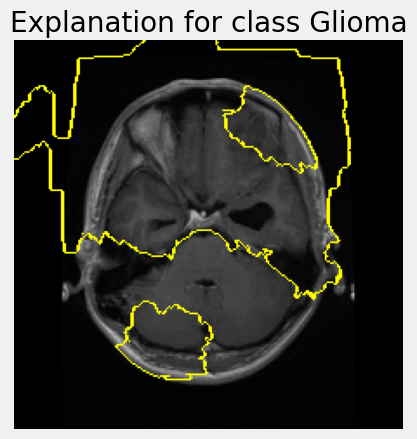

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

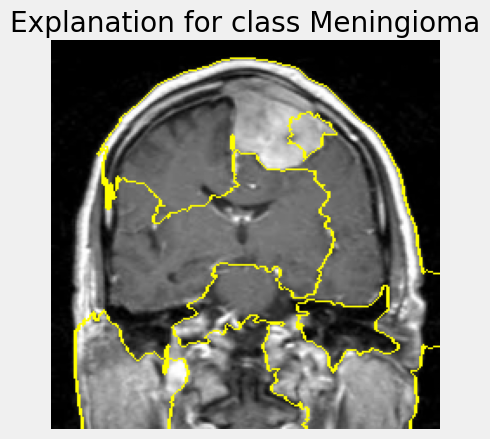

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

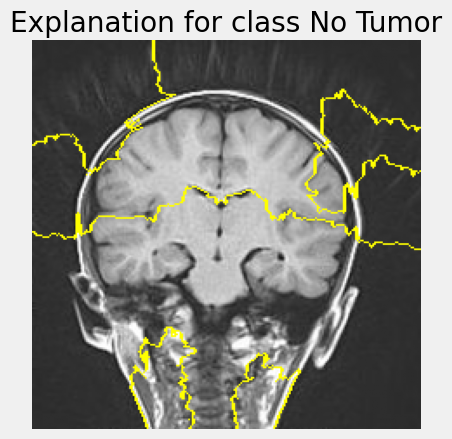

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

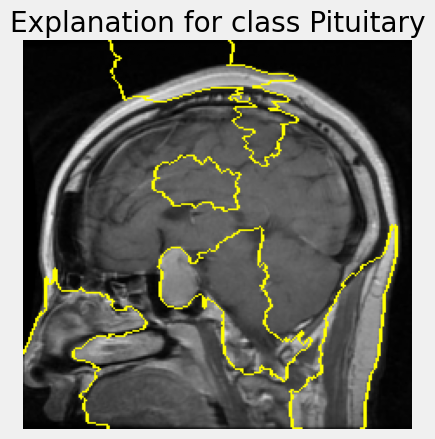

In [59]:
img_path = "/content/drive/MyDrive/FinalMSDataset/Testing/glioma/Te-glTr_0004.jpg"
explanation = explain_image_with_lime(img_path, vit_model )

img_path = "/content/drive/MyDrive/FinalMSDataset/Testing/meningioma/Te-me_0042.jpg"
explanation = explain_image_with_lime(img_path, vit_model )

img_path = "/content/drive/MyDrive/FinalMSDataset/Testing/notumor/Te-no_0025.jpg"
explanation = explain_image_with_lime(img_path, vit_model )

img_path = "/content/drive/MyDrive/FinalMSDataset/Training/pituitary/Tr-pi_0022.jpg"
explanation = explain_image_with_lime(img_path, vit_model )

# Explaining the CrossViT Model

# Explaining the CaiT Model

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━

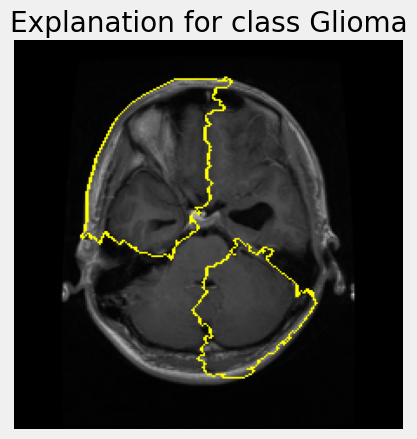

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

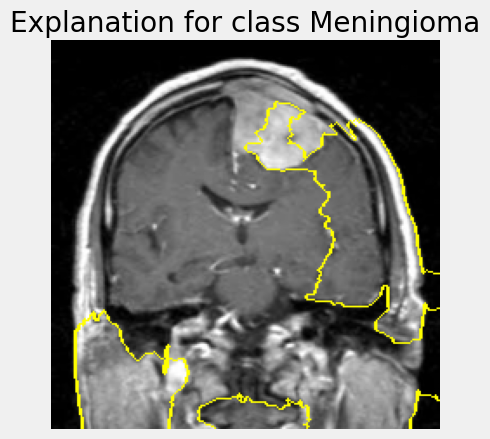

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

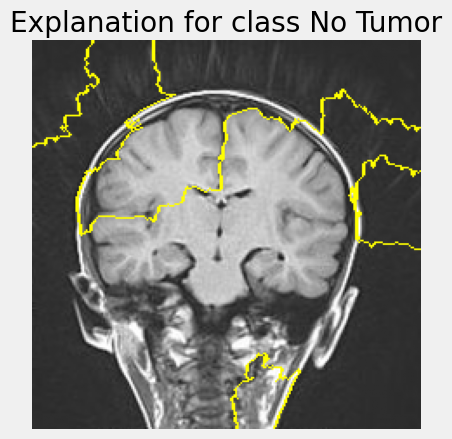

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

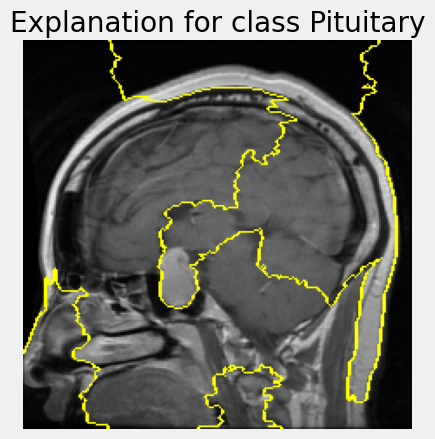

In [60]:
img_path = "/content/drive/MyDrive/FinalMSDataset/Testing/glioma/Te-glTr_0004.jpg"
explanation = explain_image_with_lime(img_path, cait_model )

img_path = "/content/drive/MyDrive/FinalMSDataset/Testing/meningioma/Te-me_0042.jpg"
explanation = explain_image_with_lime(img_path, cait_model )

img_path = "/content/drive/MyDrive/FinalMSDataset/Testing/notumor/Te-no_0025.jpg"
explanation = explain_image_with_lime(img_path, cait_model )

img_path = "/content/drive/MyDrive/FinalMSDataset/Training/pituitary/Tr-pi_0022.jpg"
explanation = explain_image_with_lime(img_path, cait_model )

# Using SHAP Algorithm

In [61]:
pip install shap

# Explaining the models using SHAP

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import shap
from PIL import Image

def shap_explain_image(img_path, model):
    # Load and preprocess the image for the model
    img = Image.open(img_path).convert('RGB')  # Ensure image is in RGB format
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img) / 255.0  # Normalize the image

    # Add batch dimension for prediction
    input_img = np.expand_dims(img, axis=0)

    # Define SHAP explainer with an image masker
    explainer = shap.Explainer(model, masker=shap.maskers.Image("inpaint_telea", (224, 224, 3)))

    # Calculate SHAP values for the image
    shap_values = explainer(input_img)

    # Debugging statements to understand the shape of SHAP values and model prediction
    print(f"Shape of input image (for model): {input_img.shape}")
    print(f"Shape of model output: {model.predict(input_img).shape}")
    print(f"Shape of shap_values: {shap_values.values.shape}")

    # Get the model's prediction and select the top class
    pred = model.predict(input_img)
    class_index = np.argmax(pred)  # Top predicted class

    # Check if the shap_values contain channels for each class and select the appropriate one
    if shap_values.values.shape[-1] > class_index:
        # Display the SHAP explanation for the predicted class
        shap.image_plot([shap_values.values[..., class_index]], input_img)
    else:
        print(f"Error: class_index {class_index} is out of bounds for SHAP values, last dimension: {shap_values.values.shape[-1]}")

# Explaining ViT model using SHAP

Explaining the Glioma Image


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:37, 37.15s/it]               

Shape of input image (for model): (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Shape of model output: (1, 4)
Shape of shap_values: (1, 224, 224, 3, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


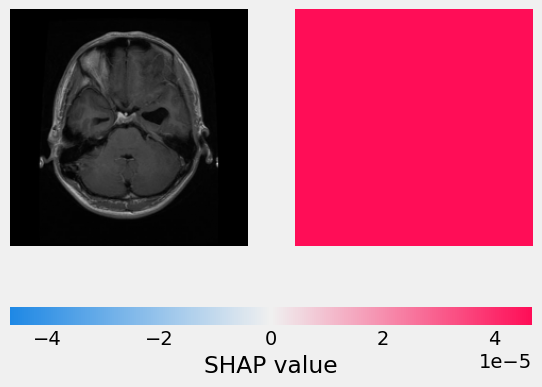


Explaining the Meningioma Image


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:25, 25.10s/it]               

Shape of input image (for model): (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Shape of model output: (1, 4)
Shape of shap_values: (1, 224, 224, 3, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


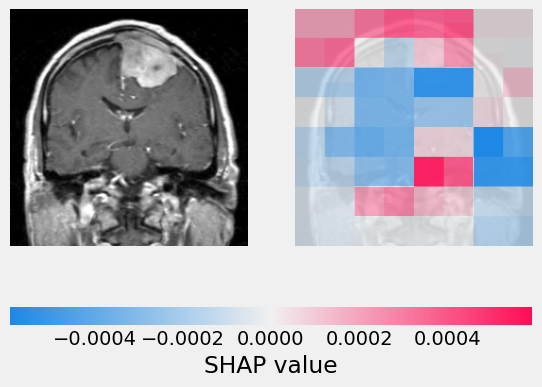


Explaining the NoTumor Image


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:24, 24.79s/it]               

Shape of input image (for model): (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Shape of model output: (1, 4)
Shape of shap_values: (1, 224, 224, 3, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


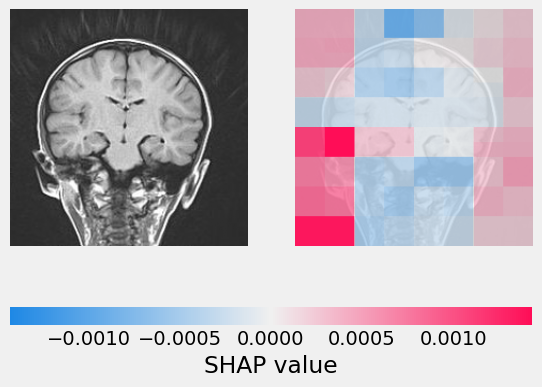


Explaining the Pituitary Image


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:33, 33.10s/it]               

Shape of input image (for model): (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Shape of model output: (1, 4)
Shape of shap_values: (1, 224, 224, 3, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


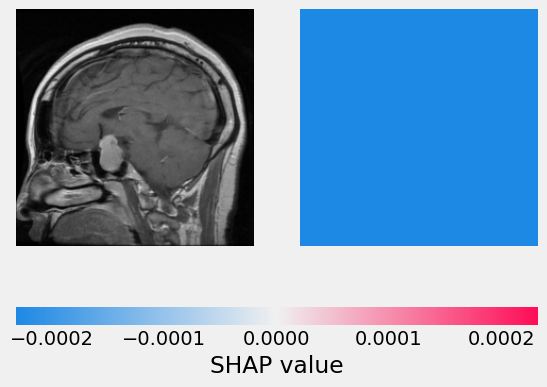

In [63]:
print("Explaining the Glioma Image")
shap_explain_image("/content/drive/MyDrive/FinalMSDataset/Testing/glioma/Te-glTr_0004.jpg", vit_model)
print("\nExplaining the Meningioma Image")
shap_explain_image("/content/drive/MyDrive/FinalMSDataset/Testing/meningioma/Te-me_0042.jpg", vit_model)
print("\nExplaining the NoTumor Image")
shap_explain_image("/content/drive/MyDrive/FinalMSDataset/Testing/notumor/Te-no_0025.jpg", vit_model)
print("\nExplaining the Pituitary Image")
shap_explain_image("/content/drive/MyDrive/FinalMSDataset/Training/pituitary/Tr-pi_0022.jpg", vit_model)

# Explaining CrossViT model using SHAP

Explaining the Glioma Image


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:27, 27.25s/it]               

Shape of input image (for model): (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Shape of model output: (1, 4)
Shape of shap_values: (1, 224, 224, 3, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


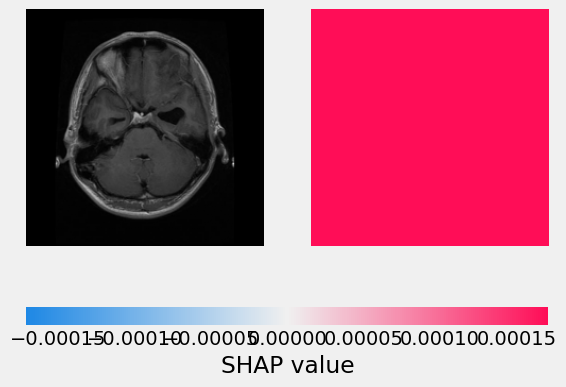


Explaining the Meningioma Image


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:25, 25.19s/it]               

Shape of input image (for model): (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Shape of model output: (1, 4)
Shape of shap_values: (1, 224, 224, 3, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


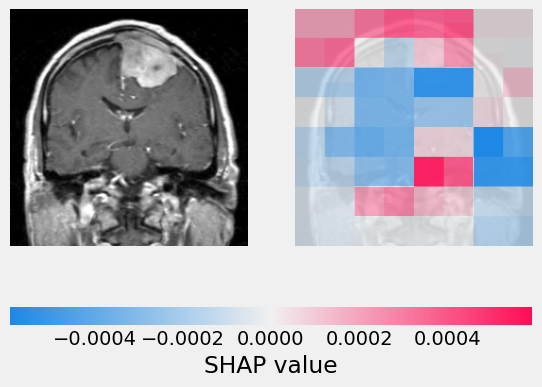


Explaining the NoTumor Image


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:24, 24.73s/it]               

Shape of input image (for model): (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Shape of model output: (1, 4)
Shape of shap_values: (1, 224, 224, 3, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


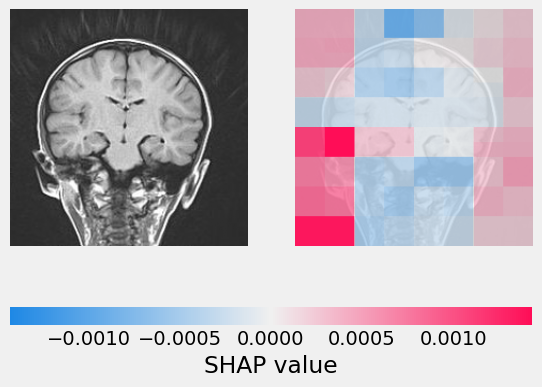


Explaining the Pituitary Image


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:33, 33.04s/it]               

Shape of input image (for model): (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Shape of model output: (1, 4)
Shape of shap_values: (1, 224, 224, 3, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


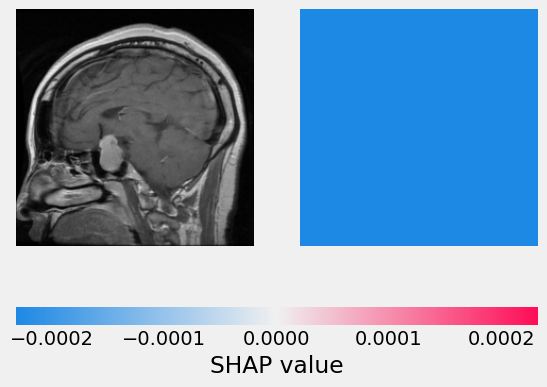

In [64]:
print("Explaining the Glioma Image")
shap_explain_image("/content/drive/MyDrive/FinalMSDataset/Testing/glioma/Te-glTr_0004.jpg", crossvit_model)
print("\nExplaining the Meningioma Image")
shap_explain_image("/content/drive/MyDrive/FinalMSDataset/Testing/meningioma/Te-me_0042.jpg", vit_model)
print("\nExplaining the NoTumor Image")
shap_explain_image("/content/drive/MyDrive/FinalMSDataset/Testing/notumor/Te-no_0025.jpg", vit_model)
print("\nExplaining the Pituitary Image")
shap_explain_image("/content/drive/MyDrive/FinalMSDataset/Training/pituitary/Tr-pi_0022.jpg", vit_model)

# Explaining the CaiT model using SHAP

Explaining the Glioma Image


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:33, 33.05s/it]               

Shape of input image (for model): (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Shape of model output: (1, 4)
Shape of shap_values: (1, 224, 224, 3, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


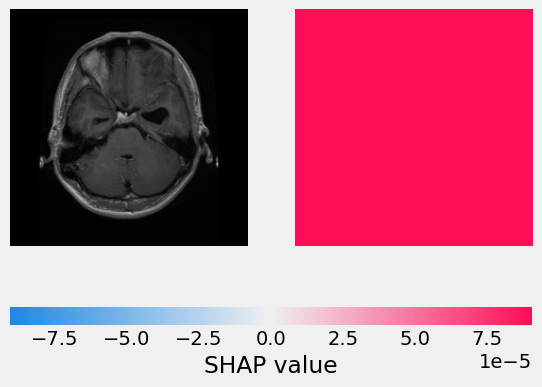


Explaining the Meningioma Image


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:21, 21.01s/it]               

Shape of input image (for model): (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Shape of model output: (1, 4)
Shape of shap_values: (1, 224, 224, 3, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


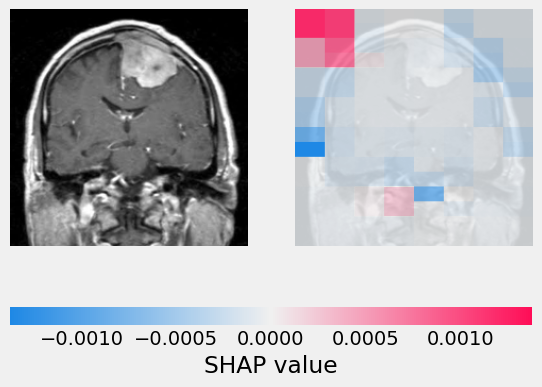


Explaining the NoTumor Image


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:21, 21.50s/it]               

Shape of input image (for model): (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Shape of model output: (1, 4)
Shape of shap_values: (1, 224, 224, 3, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


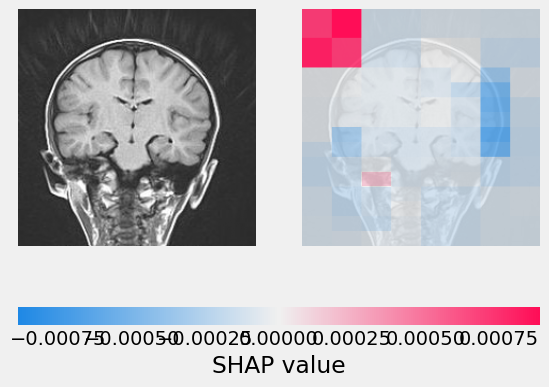


Explaining the Pituitary Image


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:33, 33.01s/it]               

Shape of input image (for model): (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Shape of model output: (1, 4)
Shape of shap_values: (1, 224, 224, 3, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


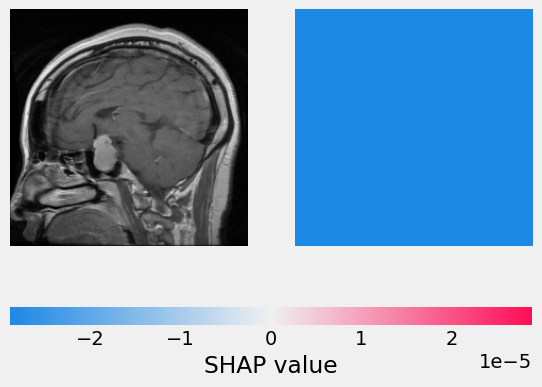

In [65]:
print("Explaining the Glioma Image")
shap_explain_image("/content/drive/MyDrive/FinalMSDataset/Testing/glioma/Te-glTr_0004.jpg", cait_model)
print("\nExplaining the Meningioma Image")
shap_explain_image("/content/drive/MyDrive/FinalMSDataset/Testing/meningioma/Te-me_0042.jpg", cait_model)
print("\nExplaining the NoTumor Image")
shap_explain_image("/content/drive/MyDrive/FinalMSDataset/Testing/notumor/Te-no_0025.jpg", cait_model)
print("\nExplaining the Pituitary Image")
shap_explain_image("/content/drive/MyDrive/FinalMSDataset/Training/pituitary/Tr-pi_0022.jpg", cait_model)